**DATASET-1**

**Arpitha Hiresadrahalli Dayananda**

**Keval Dharmendra Joshi**

**Soujanya Mulakalapally**



In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import shap
import xgboost as xgb
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge 
from xgboost import XGBRegressor
from pandas.plotting import autocorrelation_plot

from matplotlib import pyplot
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as ap

import statsmodels.api as am


**Data loading section**

In [ ]:
 test = pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/test.csv')
 train = pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/train_AI.csv')
 stores = pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/stores.csv')
store1 = pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_01.csv')
store2 = pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_02_f.csv')
store3= pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_03_f.csv')
store4= pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_04_f.csv')
store5= pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_05_f.csv')
store6=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_06_f.csv')
store7=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_07_f.csv')
store8=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_08_f.csv')
store9=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_09_f.csv')
store10=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_10_f.csv')
store11_35=pd.read_csv('https://raw.githubusercontent.com/ArpithaHD/AI_dataset_final/main/store_11_35_f.csv')


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [ ]:
# changing datatype to datetime format
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [ ]:
merge_store12= store1.append(store2)
merge_store123= merge_store12.append(store3)
merge_store1234=merge_store123.append(store4)
merge_store12345=merge_store1234.append(store5)
merge_store123456=merge_store12345.append(store6)
merge_store1234567=merge_store123456.append(store7)
merge_store12345678=merge_store1234567.append(store8)
merge_store123456789=merge_store12345678.append(store9)
merge_store12345678910=merge_store123456789.append(store10)

merge_store12345678910_11_35=merge_store12345678910.append(store11_35)

train_store=train.merge(stores,how="left", on=['Store'])

merge_store12345678910_11_35['Date']=pd.to_datetime(merge_store12345678910_11_35['Date'])


train_store_storeattributes=train_store.merge(merge_store12345678910_11_35, how="left", on=['Store','Date','IsHoliday'])
#train_store_storeattributes


#for first 10 stores data merging

merge_store12345678910['Date']=pd.to_datetime(merge_store12345678910['Date'])
train_store_attributes10=train_store.merge(merge_store12345678910, how="left", on=['Store','Date','IsHoliday'])

#train_store_storeattributes.info()

print(train_store_attributes10.head(3))

#only stores 11-35
store11_35['Date']=pd.to_datetime(store11_35['Date'])
train_store_attributes11_35=train_store.merge(store11_35, how="left", on=['Store','Date','IsHoliday'])
#train_store_attributes11_35.info()

print(train_store_attributes11_35.head(3))


   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        59.33   
1      1     1 2010-02-12      46039.49       True    A  151315        51.65   
2      1     1 2010-02-19      41595.55      False    A  151315        52.39   

   gas_price  discount_promotional  discount_clearance  discount_damaged_good  \
0      3.360               9667.50              268.29                   0.60   
1      3.409               8687.47             1594.87                   2.20   
2      3.510               2706.87             3128.74                   1.88   

   discount_competitive         CPI  Unemployment  
0               8368.15  223.659114         6.833  
1               2144.87  223.753643         6.833  
2               2396.68  223.917015         6.833  
   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315   

In [ ]:
##test data processing

test_store=test.merge(stores,how="left", on=['Store'])


test_store_storeattributes=test_store.merge(merge_store12345678910_11_35, how="left", on=['Store','Date','IsHoliday'])
test_store_attributes10=test_store.merge(merge_store12345678910, how="left", on=['Store','Date','IsHoliday'])


test_store_storeattributes.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  115064 non-null  int64         
 1   Dept                   115064 non-null  int64         
 2   Date                   115064 non-null  datetime64[ns]
 3   IsHoliday              115064 non-null  bool          
 4   Type                   115064 non-null  object        
 5   Size                   115064 non-null  int64         
 6   Temperature            92627 non-null   float64       
 7   gas_price              92627 non-null   float64       
 8   discount_promotional   92627 non-null   float64       
 9   discount_clearance     73405 non-null   float64       
 10  discount_damaged_good  87433 non-null   float64       
 11  discount_competitive   88800 non-null   float64       
 12  CPI                    61892 non-null   floa

**A.Identify the key variables for the model using correlation plots, heatmaps, histograms, feature importance (SHAP).**

**Correlation plot and Heatmap of data is as below:**

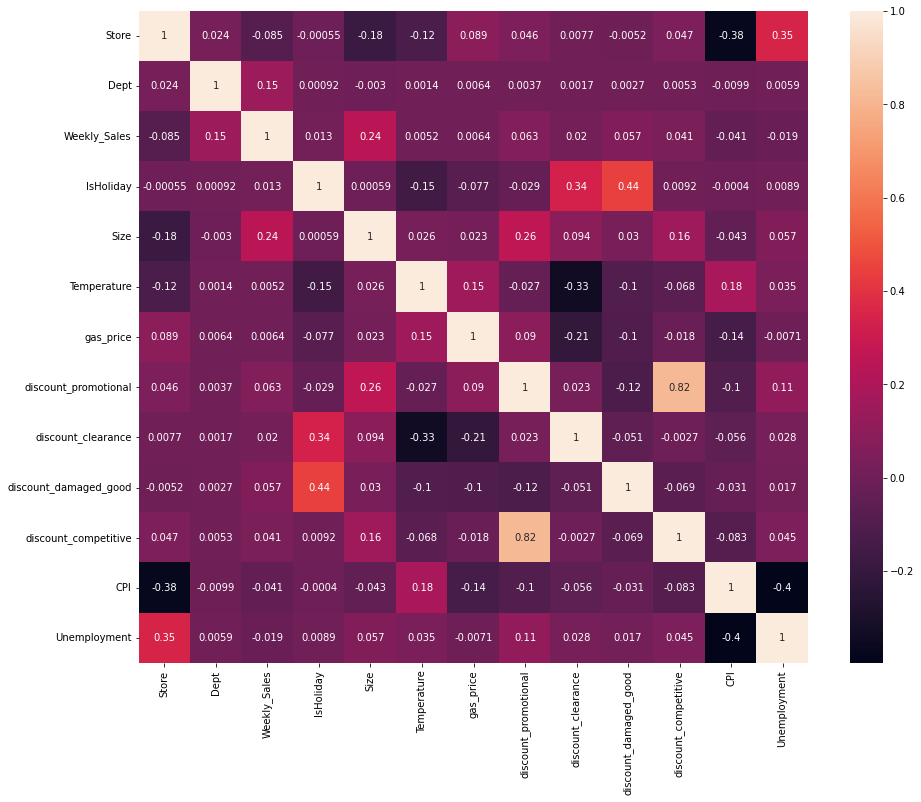

In [ ]:
plt.figure(figsize=(15,12))
correlation = train_store_storeattributes.corr()
sns.heatmap(correlation, annot=True)

**Another view of the corelation plot of weekly sales with respect to other columns**



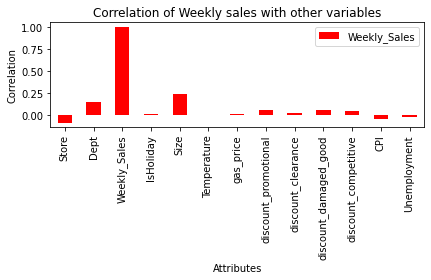

In [ ]:
correlation_final =train_store_storeattributes.corr()
ax=correlation_final[['Weekly_Sales']].plot(kind='bar',color="red")
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

**Correlation bar graph view of weekly sales with other columns**

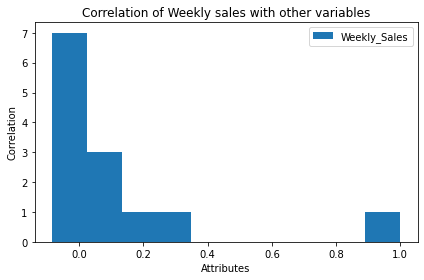

In [ ]:
correlation_final =train_store_storeattributes.corr()
ax=correlation_final[['Weekly_Sales']].plot.hist()
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

In [ ]:

label_encoder = preprocessing.LabelEncoder()
train_store_storeattributes['Type']= label_encoder.fit_transform(train_store_storeattributes['Type']) 
train_store_storeattributes.dtypes

##for test dataset
test_store_storeattributes['Type']=label_encoder.fit_transform(test_store_storeattributes['Type']) 
test_store_storeattributes.dtypes


Store                             int64
Dept                              int64
Date                     datetime64[ns]
IsHoliday                          bool
Type                              int64
Size                              int64
Temperature                     float64
gas_price                       float64
discount_promotional            float64
discount_clearance              float64
discount_damaged_good           float64
discount_competitive            float64
CPI                             float64
Unemployment                    float64
dtype: object

[01:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


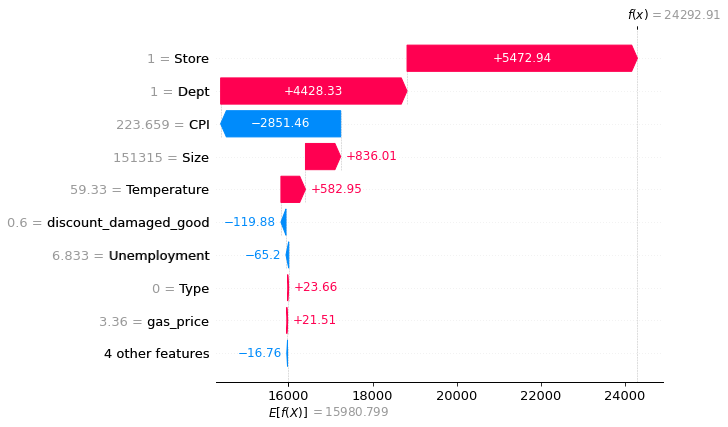

In [ ]:
Weeklysales=train_store_storeattributes["Weekly_Sales"]

columnswsales=train_store_storeattributes.loc[:, train_store_storeattributes.columns != 'Weekly_Sales']

AllColumns=columnswsales.drop('Date',axis=1)

model_shap = xgb.XGBRegressor().fit(AllColumns, Weeklysales)

explainer = shap.Explainer(model_shap)
shap_values = explainer(AllColumns)

# visualizing the first prediction's explanation
shap.plots.waterfall(shap_values[0])

**Histogram analyis of key variables**

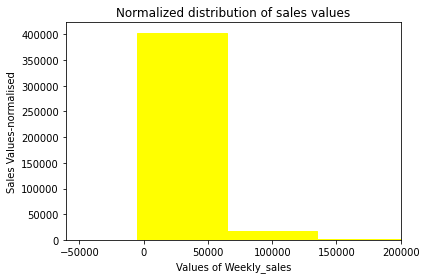

In [ ]:
final_copy = copy.deepcopy(train_store_storeattributes)

final_copy1 = final_copy["Weekly_Sales"]

weeklysales_data = np.concatenate((final_copy1[final_copy["Weekly_Sales"] < 0], final_copy1[final_copy["Weekly_Sales"] > 0]))

plt.hist(weeklysales_data, density=True)
plt.hist(weeklysales_data, color = "yellow", ec="yellow")

plt.xlim([-60496, 200000])
plt.xlabel('Values of Weekly_sales')
plt.ylabel('Sales Values-normalised')
plt.title('Normalized distribution of sales values')
plt.show()


As can be seen, there are some erroneous recording of sales. The sales can not be negative for a particular month, as illustrated in the graph. 

Text(0.5, 0, 'Date')

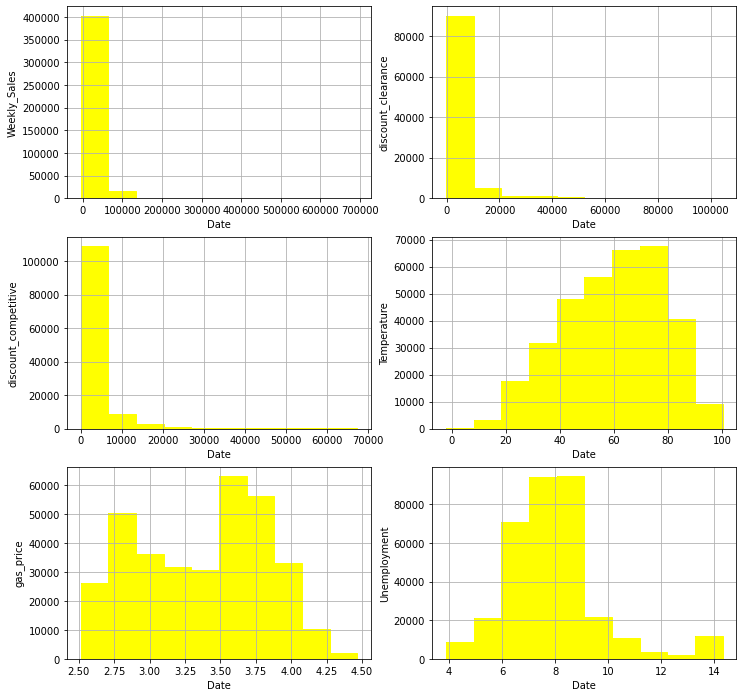

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
fig = train_store_storeattributes.Weekly_Sales.hist(bins=10)
plt.hist(train_store_storeattributes.Weekly_Sales, color = "yellow", ec="yellow")
fig.set_ylabel('Weekly_Sales')
fig.set_xlabel('Date')

plt.subplot(3, 2, 2)
fig = train_store_storeattributes.discount_clearance.hist(bins=10)
plt.hist(train_store_storeattributes.discount_clearance, color = "yellow", ec="yellow")
fig.set_ylabel('discount_clearance')
fig.set_xlabel('Date')

plt.subplot(3, 2, 3)
fig = train_store_storeattributes.discount_competitive.hist(bins=10)
plt.hist(train_store_storeattributes.discount_competitive, color = "yellow", ec="yellow")
fig.set_ylabel('discount_competitive')
fig.set_xlabel('Date')

plt.subplot(3, 2, 4)
fig = train_store_storeattributes.Temperature.hist(bins=10)
plt.hist(train_store_storeattributes.Temperature, color = "yellow", ec="yellow")
fig.set_ylabel('Temperature')
fig.set_xlabel('Date')

plt.subplot(3, 2, 5)
fig = train_store_storeattributes.gas_price.hist(bins=10)
plt.hist(train_store_storeattributes.gas_price, color = "yellow", ec="yellow")
fig.set_ylabel('gas_price')
fig.set_xlabel('Date')

plt.subplot(3, 2, 6)
fig = train_store_storeattributes.Unemployment.hist(bins=10)
plt.hist(train_store_storeattributes.Unemployment, color = "yellow", ec="yellow")
fig.set_ylabel('Unemployment')
fig.set_xlabel('Date')

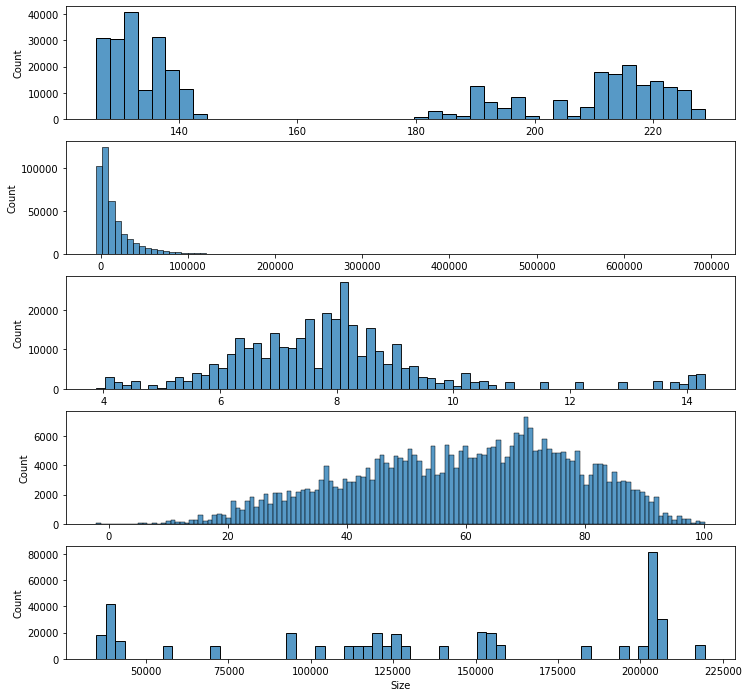

In [ ]:
s,ax=plt.subplots(5,figsize=(12,12))
sns.histplot(train_store_storeattributes.CPI,ax=ax[0])
sns.histplot(train_store_storeattributes.Weekly_Sales,bins=100,ax=ax[1])
sns.histplot(train_store_storeattributes.Unemployment,bins=70,ax=ax[2])
sns.histplot(train_store_storeattributes.Temperature,ax=ax[3])
sns.histplot(train_store_storeattributes.Size,ax=ax[4])


 **B)For the first 10 stores visualize the weekly and monthly sales patterns for top 35% of the department sales.**



81
962


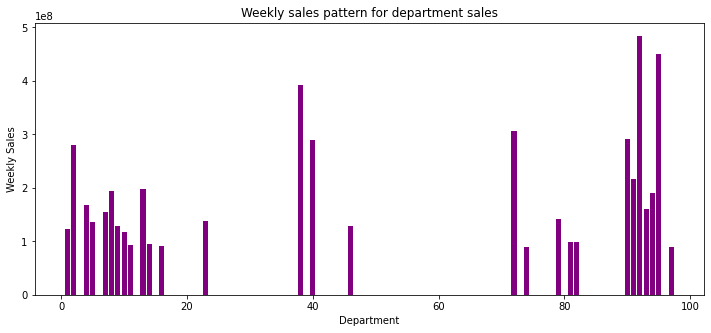

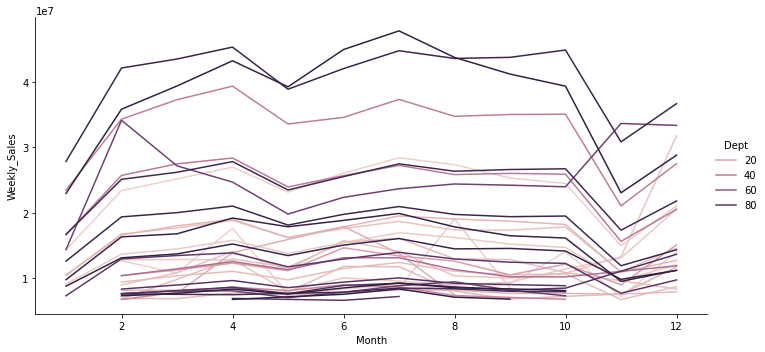

In [ ]:
##Weekly_sales computation
sales_per_week = train_store_attributes10.groupby(by=['Dept'],as_index=False)['Weekly_Sales'].sum()

len(sales_per_week)  ###81


###Taking the maximum sales for top 35% best performing stores
m=sales_per_week.sort_values(by=['Weekly_Sales'], ascending=False)

print(len(m))###81---35% of 81 
ws=m.head(28)

plt.figure(figsize=(12,5))
plt.bar(ws["Dept"],ws["Weekly_Sales"],color='purple')
plt.xlabel("Department")
plt.ylabel("Weekly Sales")
plt.title("Weekly sales pattern for department sales")


###for monthly sales computation taking month from date

train_store_attributes10["Day"]= pd.DatetimeIndex(train_store_attributes10['Date']).day
train_store_attributes10['Month'] = pd.DatetimeIndex(train_store_attributes10['Date']).month
train_store_attributes10['Year'] = pd.DatetimeIndex(train_store_attributes10['Date']).year
train_store_attributes10


sales_per_week_month = train_store_attributes10.groupby(by=['Dept','Month'],as_index=False)['Weekly_Sales'].sum()

##taking top 35% of best performing stores
monthly_sales_best=sales_per_week_month.sort_values(by=['Weekly_Sales'], ascending=False)
print(len(monthly_sales_best))###962

monthly_sales=monthly_sales_best.head(336)  ###35% of 962

sns.relplot(data=monthly_sales, x="Month", y="Weekly_Sales", kind="line",height=5, aspect=2,hue='Dept',ci=None)


**B.1.	Identify the best department across the first ten stores.**

In [ ]:
best_dept_sales=sales_per_week['Weekly_Sales'].max()

print(best_dept_sales)

sales_per_week[sales_per_week['Weekly_Sales']==sales_per_week['Weekly_Sales'].max()]


483943341.87


,Dept,Weekly_Sales
73,92,4.839433e+08


Department 92 is best department among first 10 stores as it has maximum sales weekly.

**C.	Investigate the relationship between weekly sales over CPI and unemployment for the first 10 stores. You can explore the what-if scenarios while writing the report.**

              Weekly_Sales       CPI  Unemployment
Weekly_Sales      1.000000 -0.195452      0.002259
CPI              -0.195452  1.000000     -0.241247
Unemployment      0.002259 -0.241247      1.000000


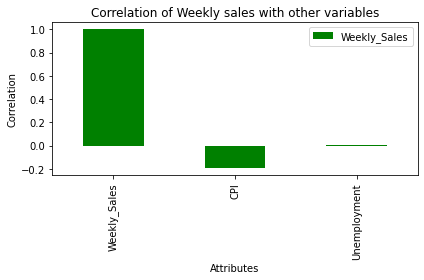

In [ ]:
correlation_first10 =train_store_attributes10.corr()

#taking only required columns to check
cf10= correlation_first10[['Weekly_Sales','CPI','Unemployment']]

row = cf10[(cf10['Weekly_Sales']== 1.000000) | (cf10['CPI']==1.000000) | (cf10['Unemployment']==1.000000)]
print(row)

ax=row[['Weekly_Sales']].plot(kind='bar',color="green")
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

From the above correlation matrix we can see that unemployment has -ve or week relationship with weekly sales and CPI has also has week relationship with weekly sales for first 10 stores.



**D.Investigate the impact of various types of discounts, for example, discount promotional, discount clearance, discount damaged good, discount competitive and discount employee on the overall sales.**

**D.1.Which type of discount is helpful in increasing the sales? Consider top 30% of the best performing stores (sales per 1000 square feet).**

**D.2.Does the observed behavior hold true for all the stores? Consider bottom 30% of the least performing store (sales per 1000 square feet).**


**D.1.Which type of discount is helpful in increasing the sales? Consider top 30% of the best performing stores (sales per 1000 square feet).**

[20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23]


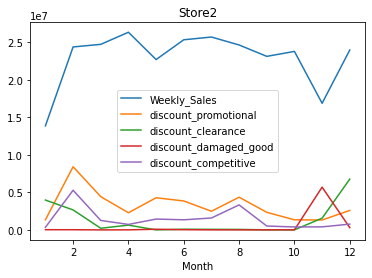

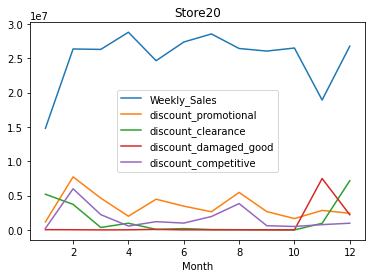

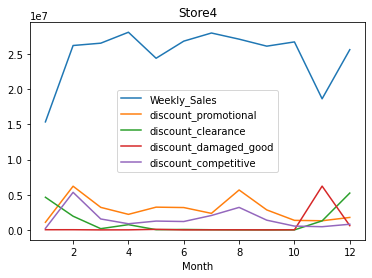

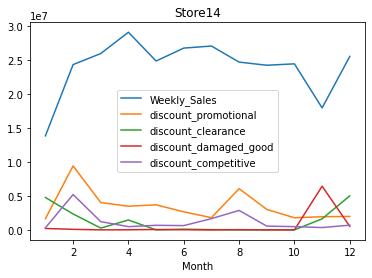

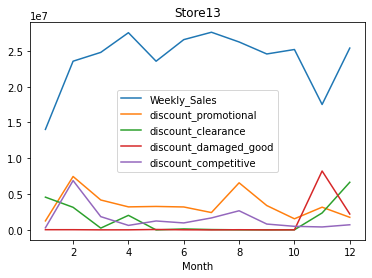

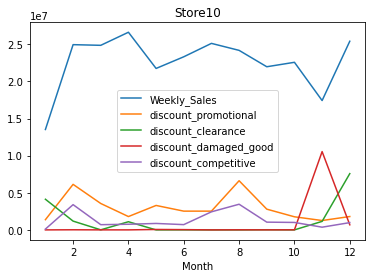

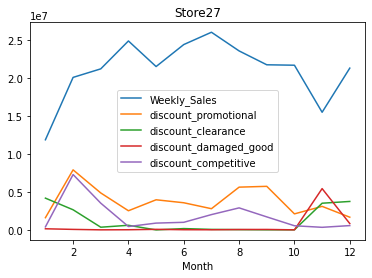

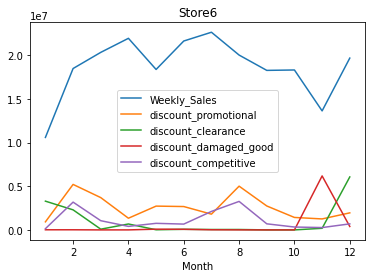

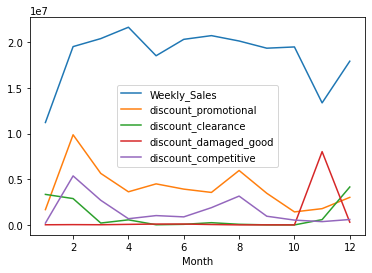

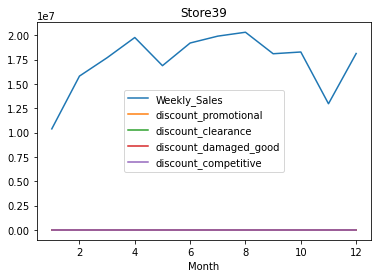

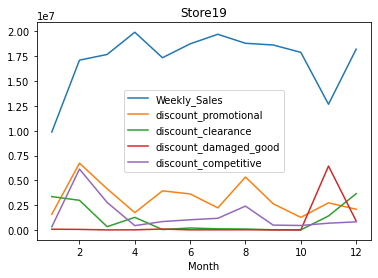

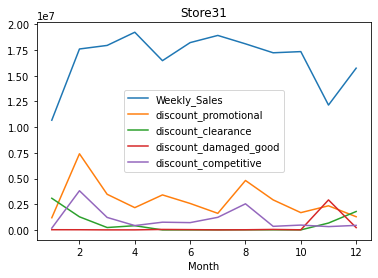

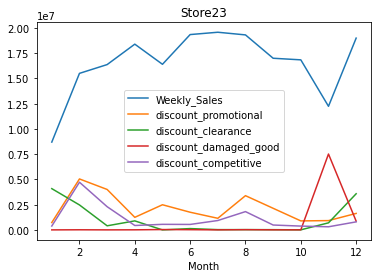

In [ ]:

train_store_storeattributes.fillna(0,inplace=True)


train_store_storeattributes["Day"]= pd.DatetimeIndex(train_store_storeattributes['Date']).day
train_store_storeattributes['Month'] = pd.DatetimeIndex(train_store_storeattributes['Date']).month
train_store_storeattributes['Year'] = pd.DatetimeIndex(train_store_storeattributes['Date']).year


best_sales_store=train_store_storeattributes.groupby(by=['Store'],as_index=False)['Weekly_Sales'].sum()

best_sales=best_sales_store.sort_values(by=['Weekly_Sales'], ascending=False)

#print(len(best_sales))###45 is the length

###Taking the top 30% so 30% of 45
best_salestop_30per=best_sales.head(13)

##seeing the top stores got to analyse the discount effect 
top_stores=list(best_salestop_30per['Store'])

print(top_stores) #[20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23]


#for store2
store2=train_store_storeattributes[(train_store_storeattributes['Store']==2)]
store2analysis = store2.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store2analysis.set_index('Month').plot(kind='line',title='Store2')


#For store 20
store20=train_store_storeattributes[(train_store_storeattributes['Store']==20)]
store20analysis = store20.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store20analysis.set_index('Month').plot(kind='line',title='Store20')


#For store 4
store4=train_store_storeattributes[(train_store_storeattributes['Store']==4)]
store4analysis = store4.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store4analysis.set_index('Month').plot(kind='line',title='Store4')

#For store 14
store14=train_store_storeattributes[(train_store_storeattributes['Store']==14)]
store14analysis = store14.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store14analysis.set_index('Month').plot(kind='line',title='Store14')

#For store 13
store13=train_store_storeattributes[(train_store_storeattributes['Store']==13)]
store13analysis = store13.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store13analysis.set_index('Month').plot(kind='line',title='Store13')

#For store 10
store10=train_store_storeattributes[(train_store_storeattributes['Store']==10)]
store10analysis = store10.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store10analysis.set_index('Month').plot(kind='line',title='Store10')


#For store 27
store27=train_store_storeattributes[(train_store_storeattributes['Store']==27)]
store27analysis = store27.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store27analysis.set_index('Month').plot(kind='line',title='Store27')

#For store 6
store6=train_store_storeattributes[(train_store_storeattributes['Store']==6)]
store6analysis = store6.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store6analysis.set_index('Month').plot(kind='line',title='Store6')

#For store 1
store1=train_store_storeattributes[(train_store_storeattributes['Store']==1)]
store1analysis = store1.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store1analysis.set_index('Month').plot(kind='line')

#For store 39
store39=train_store_storeattributes[(train_store_storeattributes['Store']==39)]
store39analysis = store39.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store39analysis.set_index('Month').plot(kind='line',title='Store39')

#For store 19
store19=train_store_storeattributes[(train_store_storeattributes['Store']==19)]
store19analysis = store19.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store19analysis.set_index('Month').plot(kind='line',title='Store19')

#For store 31
store31=train_store_storeattributes[(train_store_storeattributes['Store']==31)]
store31analysis = store31.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store31analysis.set_index('Month').plot(kind='line',title='Store31')

#For store 23
store23=train_store_storeattributes[(train_store_storeattributes['Store']==23)]
store23analysis = store23.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store23analysis.set_index('Month').plot(kind='line',title='Store23')


From the above graph we can infer that from starting couple of months discount promotional and discount competetive are followring trend with sales and with good discount of these two sales are high and we can strongly say that increase in discount damaged goods reduced the sales and recude in discount damaged good sales is increasing sales.

Discount clearance is always below for all the top 30% best performing stores when compared to discount promotional and discount competetive.

So narrowing down to discount promotional and discount competetive it is clearly seen mostly in all the top 30% best performing stores discount promotional is winner and this discount helps in increased sales.


**D.2.Does the observed behavior hold true for all the stores? Consider bottom 30% of the least performing store (sales per 1000 square feet)**

45
[7, 42, 9, 29, 16, 37, 30, 3, 38, 36, 5, 44, 33]


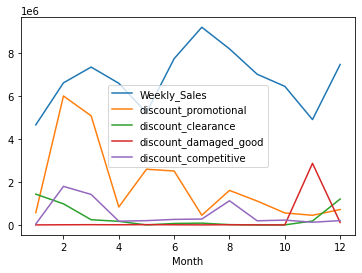

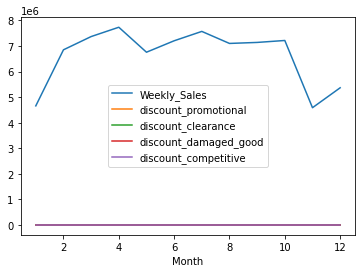

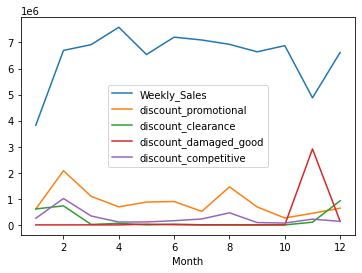

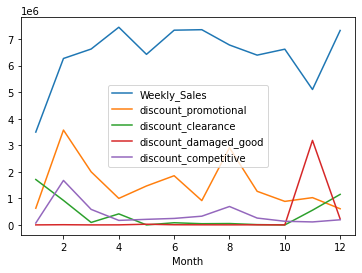

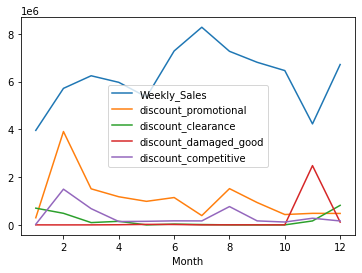

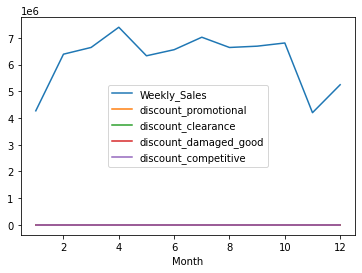

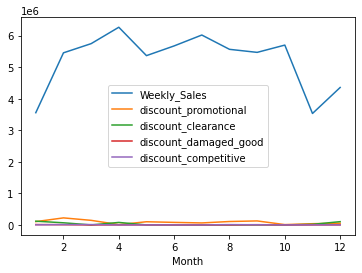

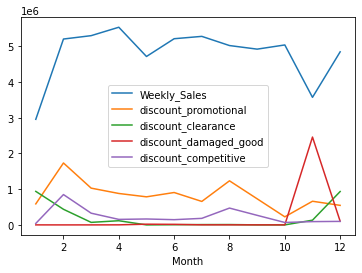

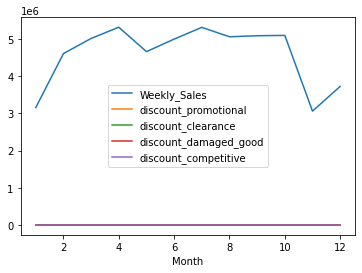

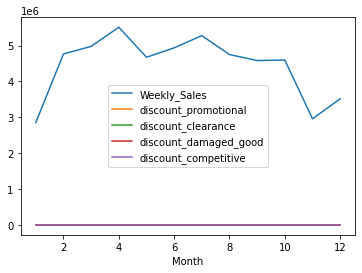

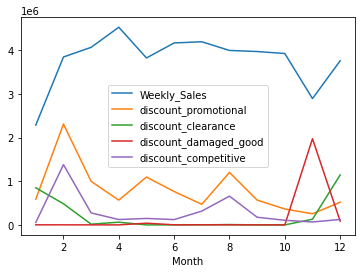

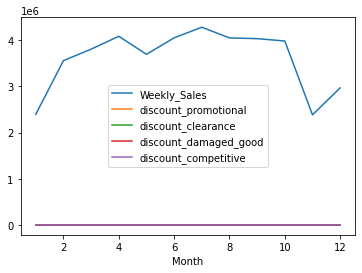

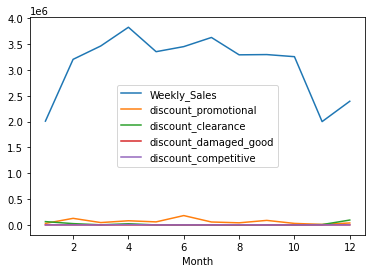

In [ ]:
print(len(best_sales))## 30% of 45 is 13.5 so 13

##Takinng bottom 30% of least performing stores
lest_selling_stores=best_sales.tail(13)

least_stores=list(lest_selling_stores['Store'])

##list of the stores
print(least_stores) ##[7, 42, 9, 29, 16, 37, 30, 3, 38, 36, 5, 44, 33]

#For store 7
store7=train_store_storeattributes[(train_store_storeattributes['Store']==7)]
store20analysis = store7.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store20analysis.set_index('Month').plot(kind='line')

#For store 42
store42=train_store_storeattributes[(train_store_storeattributes['Store']==42)]
store42analysis = store42.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store42analysis.set_index('Month').plot(kind='line')

#For store 9
store9=train_store_storeattributes[(train_store_storeattributes['Store']==9)]
store9analysis = store9.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store9analysis.set_index('Month').plot(kind='line')

#For store 29
store29=train_store_storeattributes[(train_store_storeattributes['Store']==29)]
store29analysis = store29.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store29analysis.set_index('Month').plot(kind='line')

#For store 16
store16=train_store_storeattributes[(train_store_storeattributes['Store']==16)]
store16analysis = store16.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store16analysis.set_index('Month').plot(kind='line')

#For store 37
store37=train_store_storeattributes[(train_store_storeattributes['Store']==37)]
store37analysis = store37.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store37analysis.set_index('Month').plot(kind='line')

#For store 30
store30=train_store_storeattributes[(train_store_storeattributes['Store']==30)]
store30analysis = store30.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store30analysis.set_index('Month').plot(kind='line')

#For store 3
store3=train_store_storeattributes[(train_store_storeattributes['Store']==3)]
store3analysis = store3.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store3analysis.set_index('Month').plot(kind='line')

#For store 38
store38=train_store_storeattributes[(train_store_storeattributes['Store']==38)]
store38analysis = store38.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store38analysis.set_index('Month').plot(kind='line')

#For store 36
store36=train_store_storeattributes[(train_store_storeattributes['Store']==36)]
store36analysis = store36.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store36analysis.set_index('Month').plot(kind='line')

#For store 5
store5=train_store_storeattributes[(train_store_storeattributes['Store']==5)]
store5analysis = store5.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store5analysis.set_index('Month').plot(kind='line')

#For store 44
store44=train_store_storeattributes[(train_store_storeattributes['Store']==44)]
store44analysis = store44.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store44analysis.set_index('Month').plot(kind='line')

#For store 33
store33=train_store_storeattributes[(train_store_storeattributes['Store']==33)]
store33analysis = store33.groupby('Month')[['Weekly_Sales','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']].sum().reset_index()
store33analysis.set_index('Month').plot(kind='line')


From top 30% of best performing stores we inferred from graphs that discount_promotional helps in increased sales this behaviour holds good for bottom 30% of least performing stores as well as it is clearly seen in the above graphs highest sales is happening only for discount promotional so can conclude that sales increases with discount promotional kind of discount for both top best 30% and bottom least 30% stores.

**E.Identify the products which are highly impacted by external factors: “temperature”, “gas price”, and “holiday”.**

[20, 4, 14, 13, 2, 10, 27]


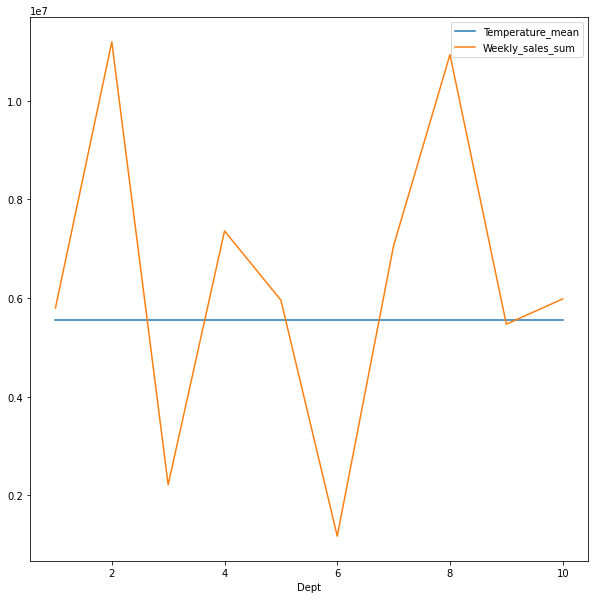

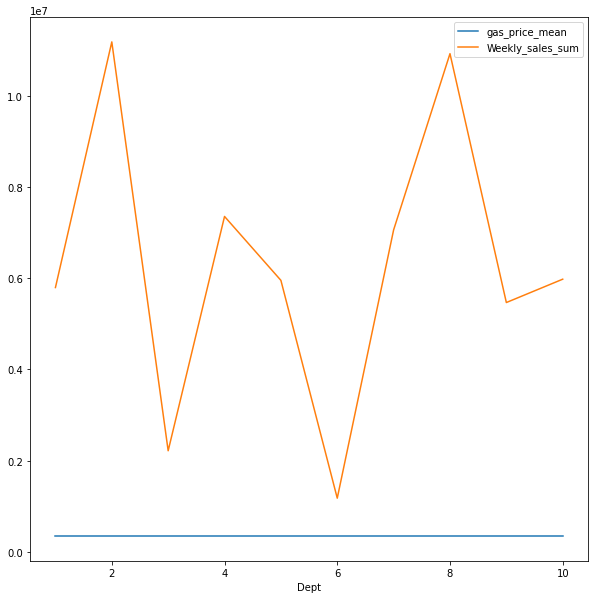

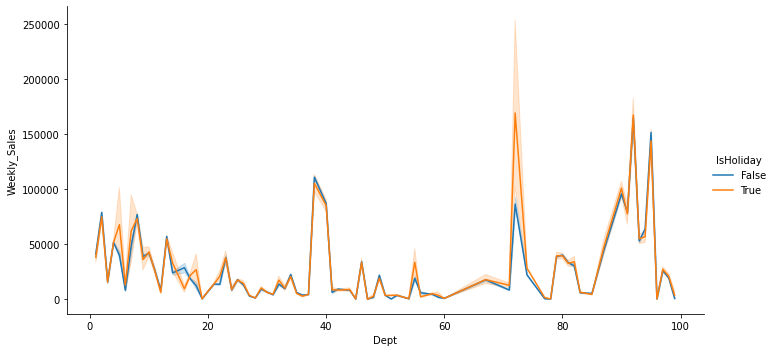

In [ ]:

###Taking the top 15% of the best performing store(calculated that in above grid i.e., of length 45)--7
best_top_15=best_sales.head(7)

##seeing the top stores got to analyse the discount effect 
top_stores_external=list(best_top_15['Store']) #####

print(top_stores_external) #[20, 4, 14, 13, 2, 10, 27]


##for temperature
#For store 20
store20=train_store_storeattributes[(train_store_storeattributes['Store']==20)]
df=store20.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df.columns=['Dept','Weekly_sales_sum','Temperature_mean']

#For store 4
store14=train_store_storeattributes[(train_store_storeattributes['Store']==14)]
df14=store14.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df14.columns=['Dept','Weekly_sales_sum','Temperature_mean']


#For store 14
store4=train_store_storeattributes[(train_store_storeattributes['Store']==4)]
df4=store4.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df4.columns=['Dept','Weekly_sales_sum','Temperature_mean']


#For store 13
store13=train_store_storeattributes[(train_store_storeattributes['Store']==13)]
df13=store13.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df13.columns=['Dept','Weekly_sales_sum','Temperature_mean']


#For store 2
store2=train_store_storeattributes[(train_store_storeattributes['Store']==2)]
df2=store2.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df2.columns=['Dept','Weekly_sales_sum','Temperature_mean']


#For store 10
store10=train_store_storeattributes[(train_store_storeattributes['Store']==10)]
df10=store10.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df10.columns=['Dept','Weekly_sales_sum','Temperature_mean']


#For store 27
store27=train_store_storeattributes[(train_store_storeattributes['Store']==27)]
df27=store27.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'Temperature':'mean'})
df27.columns=['Dept','Weekly_sales_sum','Temperature_mean']


merge204=df.append(df14)
nextmerge=merge204.append(df4)
mergenext=nextmerge.append(df13)
withother=mergenext.append(df2)
withthis=withother.append(df10)
lastmerge=withthis.append(df27)


lastmerge['Temperature_mean']=lastmerge['Temperature_mean']*int(100000)

lastmerge_tr=lastmerge.head(10)

lastmerge_tr.plot(x='Dept',y=['Temperature_mean','Weekly_sales_sum'],kind='line',figsize=(10,10))


###for gas price
#For store 20
dfg=store20.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
dfg.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 14
df14g=store14.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df14g.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 4
df4g=store4.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df4g.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 13
df13g=store13.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df13g.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 2
df2g=store2.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df2g.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 10
df10g=store10.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df10.columns=['Dept','Weekly_sales_sum','gas_price_mean']

#For store 27
df27g=store27.groupby(by=['Dept'],as_index=False).agg({'Weekly_Sales':'sum', 'gas_price':'mean'})
df27g.columns=['Dept','Weekly_sales_sum','gas_price_mean']

gasmerge=dfg.append(df14g)
nextmergeg=gasmerge.append(df4g)
mergenextg=nextmergeg.append(df13g)
withotherg=mergenextg.append(df2g)
withthisg=withotherg.append(df10g)
lastmergeg=withthisg.append(df27g)

lastmergeg['gas_price_mean']=lastmergeg['gas_price_mean']*int(100000)
lastmergeg_tr=lastmergeg.head(10)

lastmergeg_tr.plot(x='Dept',y=['gas_price_mean','Weekly_sales_sum'],kind='line',figsize=(10,10))


###isholiday

sns.relplot(data=store20, x="Dept", y="Weekly_Sales", kind="line",height=5, aspect=2,hue='IsHoliday')

**E) Is there any correlation between overall sales and holiday?**

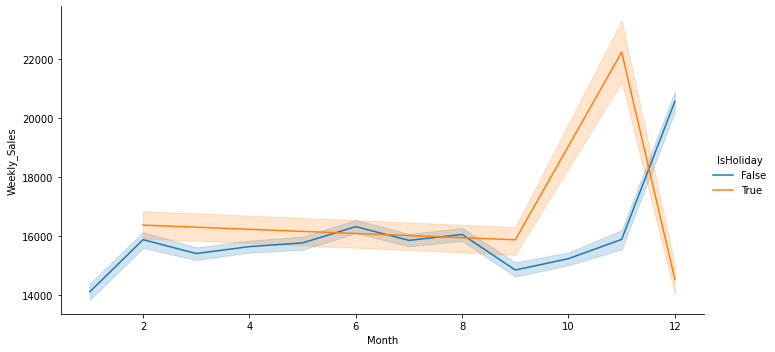

In [ ]:
sns.relplot(data=train_store_storeattributes, x="Month", y="Weekly_Sales", kind="line",height=5, aspect=2,hue='IsHoliday')

In [ ]:
ov=train_store_storeattributes.groupby(by=['IsHoliday'],as_index=False)['Weekly_Sales'].sum()
os_hol=ov['Weekly_Sales'].corr(train_store_storeattributes['IsHoliday'])
os_hol


-0.9999999999999999

 As you can see from the graph if it is holiday sales are increasing and if there is no holiday the sales are dropping. So it positively co-realted if it is IsHoliday is true and negatiely corelated if Isholiday is false.

 The above -ve value shows that it is kind of -vely co realted beacause sales are not increasing for both values of Isholiday.

**Model Building**

**Base Model - Linear Regression**

From above graphs of data analysis it can be inferred that CPI,Unemployment and store are weekly related with sales prediction so dropping these column before model building.

In [ ]:
train_store_storeattributes.isnull().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales             0
IsHoliday                0
Type                     0
Size                     0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Unemployment             0
Day                      0
Month                    0
Year                     0
dtype: int64

In [ ]:
#Selecting required features and the target one 
print(train_store_storeattributes.info())

train_store_storeattributesd=train_store_storeattributes.drop(['Date'],axis=1)

print(train_store_storeattributesd.info())

df_train, df_test = train_test_split(train_store_storeattributesd, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_list = ['Dept','Day','Month','Year','gas_price','Size','Temperature','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','CPI','Unemployment','Weekly_Sales']
scaler = MinMaxScaler()
df_train[cols_list] = scaler.fit_transform(df_train[cols_list])

y_train = df_train.pop('Weekly_Sales')
X_train = df_train

df_test[cols_list] = scaler.transform(df_test[cols_list])
# Diving Test data in X and Y
y_test = df_test.pop('Weekly_Sales')
X_test = df_test

# test_store_storeattributes.fillna(0,inplace=True)

# test_store_storeattributes["Day"]= pd.DatetimeIndex(test_store_storeattributes['Date']).day
# test_store_storeattributes['Month'] = pd.DatetimeIndex(test_store_storeattributes['Date']).month
# test_store_storeattributes['Year'] = pd.DatetimeIndex(test_store_storeattributes['Date']).year


# Xs_test= test_store_storeattributes[['Dept','Day','Month','Year','gas_price','Size','Temperature','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','CPI','Unemployment']]

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  421570 non-null  int64         
 1   Dept                   421570 non-null  int64         
 2   Date                   421570 non-null  datetime64[ns]
 3   Weekly_Sales           421570 non-null  float64       
 4   IsHoliday              421570 non-null  bool          
 5   Type                   421570 non-null  int64         
 6   Size                   421570 non-null  int64         
 7   Temperature            421570 non-null  float64       
 8   gas_price              421570 non-null  float64       
 9   discount_promotional   421570 non-null  float64       
 10  discount_clearance     421570 non-null  float64       
 11  discount_damaged_good  421570 non-null  float64       
 12  discount_competitive   421570 non-null  floa

In [ ]:
linrgrsn = LinearRegression()
linrgrsn.fit(X_train, y_train) 
y_prediction = linrgrsn.predict(X_test) 

#y_prediction = linrgrsn.predict(Xs_test)

#print(len(y_prediction))
#print(len(test_store_storeattributes))

##performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_test, y_prediction))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_test, y_prediction))
print('Score of the model:',linrgrsn.score(X_test, y_test)*100)

print(y_test)
print(y_prediction)

The Mean Absolute Error of model: 0.01831734909788823
The Mean Squared Error of model: 0.0005813874775008826
Score of the model: 11.331988480194234
124242    0.013208
6119      0.008264
420889    0.012693
359495    0.010758
337459    0.007305
            ...   
122903    0.113790
16415     0.007920
177298    0.039932
348950    0.010000
118784    0.067068
Name: Weekly_Sales, Length: 85, dtype: float64
[0.04572291 0.03340583 0.03545516 0.02476536 0.02434351 0.02309299
 0.03723215 0.02847835 0.01880023 0.02993013 0.01264001 0.03155194
 0.04453277 0.03945877 0.02640702 0.02120818 0.00511841 0.03719402
 0.03420018 0.04741605 0.03691121 0.01670965 0.01910805 0.03120379
 0.03609544 0.03872469 0.05255023 0.02646771 0.03720561 0.01969899
 0.01775522 0.01404863 0.03845932 0.02810571 0.03565919 0.02634891
 0.03048179 0.02291966 0.03019302 0.0208939  0.01882837 0.03088235
 0.02851878 0.04507265 0.0208022  0.02787236 0.01506946 0.02822863
 0.03078909 0.03386958 0.00786903 0.02438108 0.03837425 0.02

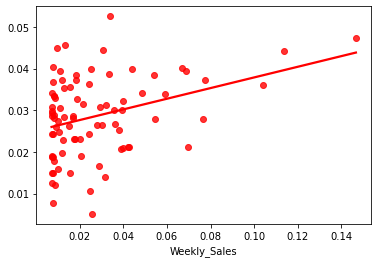

In [ ]:
sns.regplot(x=y_test,y=y_prediction,ci=None,color ='red');

In [ ]:
actpred = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
actpred


##The score of the model

#y_predr= y_prediction[:,0].reshape(-1, 1)
#y_testr=y_test.values.reshape(-1,1)
#y_testr=y_test.values.reshape(-1,1)


#print(y_testr)

#X = [df[:,1]].values.reshape(-1, 1)
#y = [df[:,0]].values

#print('Score of the model:',linrgrsn.score(y_testr, y_predr)*100)


#print('Score of the model:',linrgrsn.score(actpred.Actual,actpred.Predicted)*100)


,Actual,Predicted
124242,0.013208,0.045723
6119,0.008264,0.033406
420889,0.012693,0.035455
359495,0.010758,0.024765
337459,0.007305,0.024344
...,...,...
122903,0.113790,0.044313
16415,0.007920,0.040472
177298,0.039932,0.032227
348950,0.010000,0.016017


In [ ]:
##first 10 stores including external factors
tsd=train_store_attributes10.drop(['Date'],axis=1)

print(tsd.isnull().sum())

tsd.fillna(0,inplace=True)
print(tsd.isnull().sum())

df_traine, df_teste = train_test_split(tsd, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_list10 = ['Dept','Day','Month','Year','gas_price','Size','Temperature','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','CPI','Unemployment','Weekly_Sales']
scaler = MinMaxScaler()
df_traine[cols_list10] = scaler.fit_transform(df_traine[cols_list10])

dfp=df_traine.drop(['Type'],axis=1)


y_trainee = dfp.pop('Weekly_Sales')
X_trainee = dfp

df_teste[cols_list10] = scaler.transform(df_teste[cols_list10])
tfp=df_teste.drop(['Type'],axis=1)
# Diving Test data in X and Y
y_testee = tfp.pop('Weekly_Sales')
X_testee = tfp

X_trainee.info()

X_testee.info()

Store                         0
Dept                          0
Weekly_Sales                  0
IsHoliday                     0
Type                          0
Size                          0
Temperature              323731
gas_price                323731
discount_promotional     380978
discount_clearance       390193
discount_damaged_good    384193
discount_competitive     381578
CPI                      324649
Unemployment             324649
Day                           0
Month                         0
Year                          0
dtype: int64
Store                    0
Dept                     0
Weekly_Sales             0
IsHoliday                0
Type                     0
Size                     0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Unemployment             0
Day                      0
Month                    0
Year       

In [ ]:
linrgrsn10 = LinearRegression()
linrgrsn10.fit(X_trainee, y_trainee) 
y_predictionn = linrgrsn10.predict(X_testee) 

#y_prediction = linrgrsn.predict(Xs_test)

#print(len(y_prediction))
#print(len(test_store_storeattributes))

##performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testee, y_predictionn))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testee, y_predictionn))
print('Score of the model:',linrgrsn10.score(X_testee, y_testee)*100)

#print(y_test)
#print(y_prediction)

The Mean Absolute Error of model: 0.01855187754044593
The Mean Squared Error of model: 0.0005848934202279076
Score of the model: 10.797293492534887


[Text(0.5, 1.0, 'Linear regression - Actual vs Prediction-first 10 stores including external factors')]

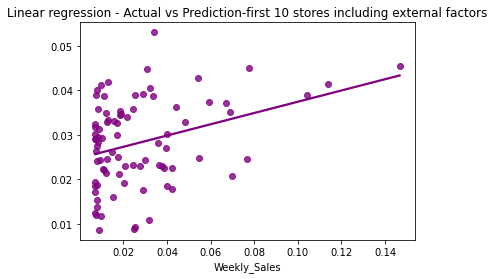

In [ ]:
sns.regplot(x=y_testee,y=y_predictionn,ci=None,color ='purple').set(title='Linear regression - Actual vs Prediction-first 10 stores including external factors')

In [ ]:
##excluding external factor

tef=train_store_attributes10.drop(['Date','IsHoliday','Temperature','Unemployment','gas_price'],axis=1)
tef.fillna(0,inplace=True)
print(tef.isnull().sum())

df_trainef, df_testef = train_test_split(tef, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_listef = ['Dept','Day','Month','Year','Size','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store']
scaler = MinMaxScaler()
df_trainef[cols_listef] = scaler.fit_transform(df_trainef[cols_listef])
tfee=df_trainef.drop(['Type'],axis=1)

y_trainef = tfee.pop('Weekly_Sales')
X_trainef = tfee

df_testef[cols_listef] = scaler.transform(df_testef[cols_listef])
tfe=df_testef.drop(['Type'],axis=1)
# Diving Test data in X and Y
y_testef = tfe.pop('Weekly_Sales')
X_testef = tfe

print(X_trainef.info())

Store                    0
Dept                     0
Weekly_Sales             0
Type                     0
Size                     0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Day                      0
Month                    0
Year                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421485 entries, 218484 to 300552
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store                  421485 non-null  float64
 1   Dept                   421485 non-null  float64
 2   Size                   421485 non-null  float64
 3   discount_promotional   421485 non-null  float64
 4   discount_clearance     421485 non-null  float64
 5   discount_damaged_good  421485 non-null  float64
 6   discount_competitive   421485 non-null  float64
 7   CPI                    421485 non-null

In [ ]:
linrgrsnn = LinearRegression()
linrgrsnn.fit(X_trainef, y_trainef) 
y_pdn = linrgrsnn.predict(X_testef) 

#y_prediction = linrgrsn.predict(Xs_test)

#print(len(y_prediction))
#print(len(test_store_storeattributes))

##performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testef, y_pdn))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testef, y_pdn))
print('Score of the model:',linrgrsnn.score(X_testef, y_testef)*100)


The Mean Absolute Error of model: 12947.484232170704
The Mean Squared Error of model: 287677820.7140935
Score of the model: 9.970060703050343


[Text(0.5, 1.0, 'Linear regression - Actual vs Prediction-first 10 stores excluding external factors')]

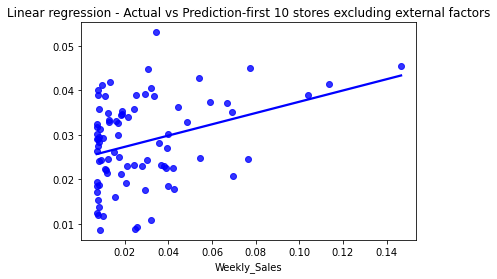

In [ ]:
sns.regplot(x=y_testee,y=y_predictionn,ci=None,color ='blue').set(title='Linear regression - Actual vs Prediction-first 10 stores excluding external factors')

In [ ]:
train_store_attributes11_35.isnull().sum() ## has some null value for columns 

train_store_attributes11_35.fillna(0,inplace=True)


train_store_attributes_1135t=train_store_attributes11_35.drop(['Type'],axis=1)


In [ ]:
print(len(train_store_attributes_1135t)) ##taking 50% of 421570

#train_store_attributes_1135ts=train_store_attributes_1135t.head(210785)


train_store_attributes_1135ts=train_store_attributes_1135t.head(126471)

print(len(train_store_attributes_1135ts))

train_store_attributes_1135ts["Day"]= pd.DatetimeIndex(train_store_attributes_1135ts['Date']).day
train_store_attributes_1135ts['Month'] = pd.DatetimeIndex(train_store_attributes_1135ts['Date']).month
train_store_attributes_1135ts['Year'] = pd.DatetimeIndex(train_store_attributes_1135ts['Date']).year

train_store_attributes11_35f=train_store_attributes_1135ts.drop(['Date'],axis=1)


Xg=train_store_attributes11_35f[['Dept','Day','Month','Year','Size','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment','CPI']]
yg=train_store_attributes11_35f['Weekly_Sales']


Xgw=train_store_attributes11_35f[['Dept','Day','Month','Year','Size','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','CPI']]
ygw=train_store_attributes11_35f['Weekly_Sales']

Xg.info()

421570
126471
<class 'pandas.core.frame.DataFrame'>
Int64Index: 126471 entries, 0 to 126470
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dept                   126471 non-null  int64  
 1   Day                    126471 non-null  int64  
 2   Month                  126471 non-null  int64  
 3   Year                   126471 non-null  int64  
 4   Size                   126471 non-null  int64  
 5   IsHoliday              126471 non-null  bool   
 6   Temperature            126471 non-null  float64
 7   gas_price              126471 non-null  float64
 8   discount_promotional   126471 non-null  float64
 9   discount_clearance     126471 non-null  float64
 10  discount_damaged_good  126471 non-null  float64
 11  discount_competitive   126471 non-null  float64
 12  Store                  126471 non-null  int64  
 13  Unemployment           126471 non-null  float64
 14  CPI                   


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Linear Regression for the store 11_35 using built model for 10 stores**

In [ ]:
#inclusion case
y_predlr = linrgrsn10.predict(Xg)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(yg, y_predlr))
print('The Mean Squared Error of model:', metrics.mean_squared_error(yg, y_predlr))


#exclusion case

y_predelre = linrgrsnn.predict(Xgw)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ygw, y_predelre))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ygw, y_predelre))

The Mean Absolute Error of model: 16806.548378199703
The Mean Squared Error of model: 870403893.024495
The Mean Absolute Error of model: 750952802.3878015
The Mean Squared Error of model: 6.664603315736966e+17


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



Redge Regression-First 10 stores

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

train_store_attributes10.isnull().sum() ## has some null value for columns 

train_store_attributes10.fillna(0,inplace=True)

In [ ]:
##including all external factor 

train_store_attributes10d=train_store_attributes10.drop(['Date'],axis=1)

train_store_attributes10dt=train_store_attributes10d.drop(['Type'],axis=1)

df_trainr, df_testr = train_test_split(train_store_attributes10dt, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_listr = ['Dept','Day','Month','Year','Size','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment']
scaler = MinMaxScaler()
df_trainr[cols_listr] = scaler.fit_transform(df_trainr[cols_listr])

y_trainr = df_trainr.pop('Weekly_Sales')
X_trainr = df_trainr

df_testr[cols_listr] = scaler.transform(df_testr[cols_listr])
# Diving Test data in X and Y
y_testr = df_testr.pop('Weekly_Sales')
X_testr = df_testr


#Xr=train_store_attributes10[['Dept','Day','Month','Year','Size','Type','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment']]
#Yr=train_store_attributes10['Weekly_Sales']

#Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,Yr,test_size=0.2,random_state=100)

In [ ]:
# Train the model #alpha=0.99

ridgeReg = Ridge(alpha = .99)

ridgeReg.fit(X_trainr,y_trainr) 
yr_prediction = ridgeReg.predict(X_testr) 

X_testr.info()


#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testr, yr_prediction))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testr, yr_prediction))

print('Score of the model:',ridgeReg.score(X_testr, y_testr)*100)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_trainr.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeReg.coef_) 
print(ridge_coefficient) 

#print(y_testr)
#print(yr_prediction)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 124242 to 118784
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store                  85 non-null     float64
 1   Dept                   85 non-null     float64
 2   IsHoliday              85 non-null     float64
 3   Size                   85 non-null     float64
 4   Temperature            85 non-null     float64
 5   gas_price              85 non-null     float64
 6   discount_promotional   85 non-null     float64
 7   discount_clearance     85 non-null     float64
 8   discount_damaged_good  85 non-null     float64
 9   discount_competitive   85 non-null     float64
 10  CPI                    85 non-null     float64
 11  Unemployment           85 non-null     float64
 12  Day                    85 non-null     float64
 13  Month                  85 non-null     float64
 14  Year                   85 non-null     float64
dtyp

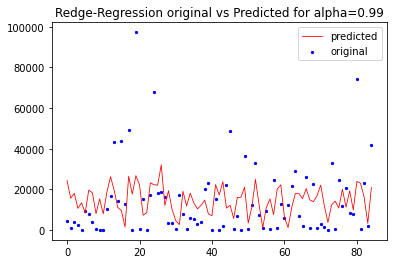

In [ ]:
x_ax = range(len(X_testr))
plt.scatter(x_ax, y_testr, s=5, color="blue", label="original")
plt.plot(x_ax, yr_prediction, lw=0.8, color="red", label="predicted")
plt.title("Redge-Regression original vs Predicted for alpha=0.99")
plt.legend()
plt.show()

In [ ]:
#alpha=17
ridgeReg17 = Ridge(alpha =17) 

ridgeReg17.fit(X_trainr,y_trainr) 
yr_prediction17 = ridgeReg17.predict(X_testr) 

#print('Accuracy of the model:',ridgeReg.score(Xr_test, yr_test)*100)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testr, yr_prediction17))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testr, yr_prediction17))
print('Score of the model:',ridgeReg17.score(X_testr, y_testr)*100)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_trainr.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeReg17.coef_) 
print(ridge_coefficient) 

The Mean Absolute Error of model: 12948.260201271554
The Mean Squared Error of model: 285033850.9289698
Score of the model: 10.79750175730606
                  Columns  Coefficient Estimate
0                   Store          -3393.180537
1                    Dept          10864.441583
2               IsHoliday            716.156447
3                    Size          15875.546684
4             Temperature           3336.387318
5               gas_price           7773.125083
6    discount_promotional          11610.714359
7      discount_clearance           3878.717130
8   discount_damaged_good          15795.216995
9    discount_competitive           2133.796225
10                    CPI            -84.365049
11           Unemployment          11797.680465
12                    Day           -463.126041
13                  Month           2034.073872
14                   Year           -450.255344


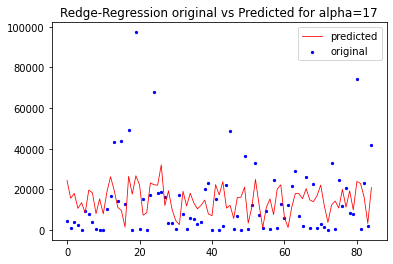

In [ ]:
x_ax = range(len(X_testr))
plt.scatter(x_ax, y_testr, s=5, color="blue", label="original")
plt.plot(x_ax, yr_prediction17, lw=0.8, color="red", label="predicted")
plt.title("Redge-Regression original vs Predicted for alpha=17")
plt.legend()
plt.show()

In [ ]:
#excluding external factors

train_store_attributes10dth=train_store_attributes10dt.drop(['IsHoliday'],axis=1)
train_store_attributes10dthm=train_store_attributes10dth.drop(['Temperature'],axis=1)
train_store_attributes10dthmu=train_store_attributes10dthm.drop(['Unemployment'],axis=1)
train_store_attributes10dthmug=train_store_attributes10dthmu.drop(['gas_price'],axis=1)

df_trainre, df_testre = train_test_split(train_store_attributes10dthmug, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_listre = ['Dept','Day','Month','Year','Size','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store']
scaler = MinMaxScaler()
df_trainre[cols_listre] = scaler.fit_transform(df_trainre[cols_listre])

y_trainre = df_trainre.pop('Weekly_Sales')
X_trainre = df_trainre

df_testre[cols_listre] = scaler.transform(df_testre[cols_listre])
# Diving Test data in X and Y
y_testre = df_testre.pop('Weekly_Sales')
X_testre = df_testre



#Xrw=train_store_attributes10[['Dept','Day','Month','Year','Size','Type','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store']]
#Yrw=train_store_attributes10['Weekly_Sales']

#Xrw_train, Xrw_test, yrw_train, yrw_test = train_test_split(Xrw,Yrw,test_size=0.2,random_state=100)



In [ ]:
#with alpha=0.99
ridgeRege = Ridge(alpha = .99) 

ridgeRege.fit(X_trainre, y_trainre) 
y_predictionre = ridgeRege.predict(X_testre) 

#Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testre, y_predictionre))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testre, y_predictionre))
print('Score of the model:',ridgeRege.score(X_testre, y_testre)*100)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_trainre.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeRege.coef_) 
print(ridge_coefficient) 

The Mean Absolute Error of model: 12947.425132618266
The Mean Squared Error of model: 287677944.4260363
Score of the model: 9.970021986896727
                  Columns  Coefficient Estimate
0                   Store          -4929.423896
1                    Dept          10916.748411
2                    Size          15746.930518
3    discount_promotional          15194.858352
4      discount_clearance           4864.630416
5   discount_damaged_good          20278.130336
6    discount_competitive           3306.110014
7                     CPI            -10.047580
8                     Day           -394.595789
9                   Month           2084.509169
10                   Year           -616.151263


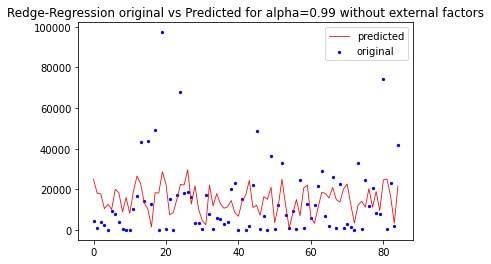

In [ ]:
x_ax = range(len(X_testre))
plt.scatter(x_ax, y_testre, s=5, color="blue", label="original")
plt.plot(x_ax, y_predictionre, lw=0.8, color="red", label="predicted")
plt.title("Redge-Regression original vs Predicted for alpha=0.99 without external factors")
plt.legend()
plt.show()

In [ ]:
##with alpha=17
ridgeRege17 = Ridge(alpha=17) 

ridgeRege17.fit(X_trainre, y_trainre) 
y_predictionre17 = ridgeRege17.predict(X_testre) 


#Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testre, y_predictionre17))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testre, y_predictionre17))
print('Score of the model:',ridgeRege17.score(X_testre, y_testre)*100)


# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_trainre.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeRege17.coef_) 
print(ridge_coefficient) 


The Mean Absolute Error of model: 12946.41725218746
The Mean Squared Error of model: 287674303.74608207
Score of the model: 9.971161352435798
                  Columns  Coefficient Estimate
0                   Store          -4928.434897
1                    Dept          10912.935786
2                    Size          15746.689065
3    discount_promotional          14128.830623
4      discount_clearance           4724.191096
5   discount_damaged_good          18720.698669
6    discount_competitive           4117.213951
7                     CPI             -9.910391
8                     Day           -392.643366
9                   Month           2090.080248
10                   Year           -603.352788


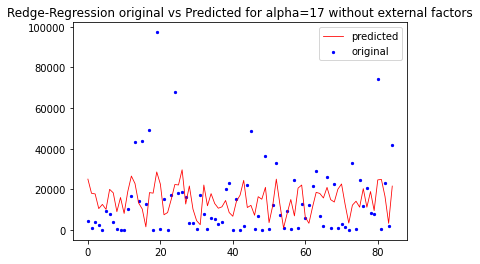

In [ ]:
x_ax = range(len(X_testre))
plt.scatter(x_ax, y_testre, s=5, color="blue", label="original")
plt.plot(x_ax, y_predictionre17, lw=0.8, color="red", label="predicted")
plt.title("Redge-Regression original vs Predicted for alpha=17 without external factors")
plt.legend()
plt.show()

**Redge Regression for 11_35 using the model built for 1_10**

In [ ]:
##for inclusion case 

#alpha=0.99
y_pred1135 = ridgeReg.predict(Xg)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(yg, y_pred1135))
print('The Mean Squared Error of model:', metrics.mean_squared_error(yg, y_pred1135))



#alpha=17

y_pred113517 = ridgeReg17.predict(Xg)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(yg, y_pred113517))
print('The Mean Squared Error of model:', metrics.mean_squared_error(yg, y_pred113517))


##for exclusion case:

#alpha=0.99
y_prede1135 = ridgeRege.predict(Xgw)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ygw, y_prede1135))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ygw, y_prede1135))


#alpha=17

y_prede113517 = ridgeRege17.predict(Xgw)

#Performance metrics

print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ygw, y_prede113517))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ygw, y_prede113517))

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



The Mean Absolute Error of model: 538816648.6142223
The Mean Squared Error of model: 3.46853855204516e+17
The Mean Absolute Error of model: 531161862.4061004
The Mean Squared Error of model: 3.363647237238198e+17
The Mean Absolute Error of model: 749554282.2603292
The Mean Squared Error of model: 6.639773187940716e+17
The Mean Absolute Error of model: 726101146.5481724
The Mean Squared Error of model: 6.22996448984605e+17


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



**XGBoost--First 10 stores**

In [ ]:
#including external factors

df_trainb, df_testb = train_test_split(train_store_attributes10dt, train_size = 0.9998, test_size = 0.0002, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
cols_listb = ['Dept','Day','Month','Year','Size','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment']
scaler = MinMaxScaler()
df_trainb[cols_listb] = scaler.fit_transform(df_trainb[cols_listb])

y_trainb = df_trainb.pop('Weekly_Sales')
X_trainb = df_trainb

df_testb[cols_listr] = scaler.transform(df_testb[cols_listr])
# Diving Test data in X and Y
y_testb = df_testb.pop('Weekly_Sales')
X_testb = df_testb


#Xb=train_store_attributes10[['Dept','Day','Month','Year','Size','Type','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment']]
#Yb=train_store_attributes10['Weekly_Sales']

#Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,Yb,test_size=0.2,random_state=100)


In [ ]:
xgb = XGBRegressor()
xgb.fit(X_trainb, y_trainb)

y_predictionxgb = xgb.predict(X_testb)

X_testb.info()

##Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(y_testb, y_predictionxgb))
print('The Mean Squared Error of model:', metrics.mean_squared_error(y_testb, y_predictionxgb))
print('Score of the model:', xgb.score(X_testb,y_testb)*100)

[01:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 124242 to 118784
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store                  85 non-null     float64
 1   Dept                   85 non-null     float64
 2   IsHoliday              85 non-null     float64
 3   Size                   85 non-null     float64
 4   Temperature            85 non-null     float64
 5   gas_price              85 non-null     float64
 6   discount_promotional   85 non-null     float64
 7   discount_clearance     85 non-null     float64
 8   discount_damaged_good  85 non-null     float64
 9   discount_competitive   85 non-null     float64
 10  CPI                    85 non-null     float64
 11  Unemployment           85 non-null     float64
 12  Day                    85 no

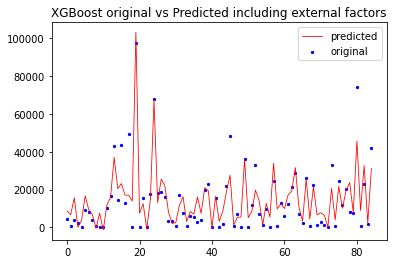

In [ ]:
x_ax = range(len(X_testb))
plt.scatter(x_ax, y_testb, s=5, color="blue", label="original")
plt.plot(x_ax, y_predictionxgb, lw=0.8, color="red", label="predicted")
plt.title("XGBoost original vs Predicted including external factors")
plt.legend()
plt.show()

In [ ]:
#excluding external factors

#df_trainbe, df_testbe = train_test_split(train_store_attributes10dthmug, train_size = 0.9998, test_size = 0.0002, random_state = 100)
#from sklearn.preprocessing import MinMaxScaler
#cols_listbe = ['Dept','Day','Month','Year','Size','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store']
#scaler = MinMaxScaler()
#df_trainb[cols_listbe] = scaler.fit_transform(df_trainb[cols_listbe])

#y_trainbe = df_trainbe.pop('Weekly_Sales')
#X_trainbe = df_trainbe

#df_testbe[cols_listbe] = scaler.transform(df_testb[cols_listbe])
# Diving Test data in X and Y
#y_testbe = df_testbe.pop('Weekly_Sales')
#X_testbe = df_testbe

Xbw=train_store_attributes10d[['Dept','Day','Month','Year','Size','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store']]
Ybw=train_store_attributes10d['Weekly_Sales']

Xbw_train, Xbw_test, ybw_train, ybw_test = train_test_split(Xbw,Ybw,test_size=0.2,random_state=100)


In [ ]:
xgbe = XGBRegressor()
xgbe.fit(Xbw_train, ybw_train)

y_predictionxgbe = xgbe.predict(Xbw_test)

##Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ybw_test, y_predictionxgbe))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ybw_test, y_predictionxgbe))
print('Score of the model:', xgbe.score(Xbw_test,ybw_test)*100)

[01:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Mean Absolute Error of model: 6968.396529056831
The Mean Squared Error of model: 133086926.60173918
Score of the model: 73.90463013091836


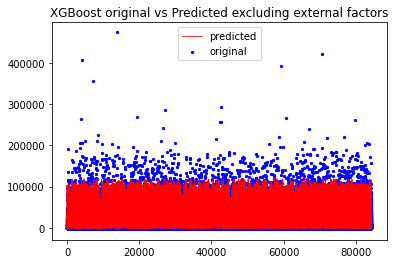

In [ ]:
x_ax = range(len(Xbw_test))
plt.scatter(x_ax, ybw_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_predictionxgbe, lw=0.8, color="red", label="predicted")
plt.title("XGBoost original vs Predicted excluding external factors")
plt.legend()
plt.show()


**XGBOOST for 11_35 using the model built for 1_10**

In [ ]:
#inclusion case

Xgb=train_store_attributes11_35f[['Store','Dept','IsHoliday','Size','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','CPI','Unemployment','Day','Month','Year']]
ygb=train_store_attributes11_35f['Weekly_Sales']

y_pred1135 = xgb.predict(Xgb)

##Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ygb, y_pred1135))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ygb, y_pred1135))
print('Score of the model:', xgb.score(Xgb,ygb)*100)


#exclusion case
Xgbw=train_store_attributes11_35f[['Dept', 'Day', 'Month', 'Year', 'Size', 'discount_promotional', 'discount_clearance', 'discount_damaged_good', 'discount_competitive', 'Store']]
y_pred1135w = xgbe.predict(Xgbw)

##Performance metrics
print('The Mean Absolute Error of model:', metrics.mean_absolute_error(ygb, y_pred1135w))
print('The Mean Squared Error of model:', metrics.mean_squared_error(ygb, y_pred1135w))
print('Score of the model:', xgbe.score(Xgbw,ygb)*100)

The Mean Absolute Error of model: 14637.136522168374
The Mean Squared Error of model: 713584790.303554
Score of the model: -19.98279357629691
The Mean Absolute Error of model: 7907.349560543148
The Mean Squared Error of model: 176413525.03579786
Score of the model: 70.33766996430388


**ARIMA Model**

In [ ]:
##including external factors

#Xa=train_store_attributes10[['Dept','Day','Month','Year','Size','Type','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment']]
#Ya=train_store_attributes10['Weekly_Sales']

#Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,Ya,test_size=0.2,random_state=100)

aref=train_store_attributes10[['Dept','Date','Type','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Store','Unemployment','Weekly_Sales']]

##considering ARIMA as univariant


Date
2010-02-05    49750740.50
2010-02-12    48336677.63
Name: Weekly_Sales, dtype: float64


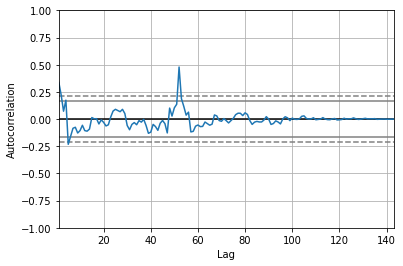

<Figure size 720x720 with 0 Axes>

In [ ]:
##check whether the data is stationary or not using time series plot and dicky-fuller test

train_store_attributes10.head()

analysis=train_store_attributes10.groupby('Date')['Weekly_Sales'].sum()

print(analysis.head(2))

autocorrelation_plot(analysis)
pyplot.figure(figsize=(10,10))
pyplot.show()



**From above graph we can infer that the data is not stationary as it is not linear**

In [ ]:
#dicky-fuller test

testdf=adfuller(analysis)
dfoutput = pd.Series(testdf[0:4], index=['Test Statistic', 'p-value', 'No. of lags used', 'No. of observations used'])

for key, value in testdf[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Test Statistic             -5.908298e+00
p-value                     2.675979e-07
No. of lags used            4.000000e+00
No. of observations used    1.380000e+02
Critical value (1%)        -3.478648e+00
Critical value (5%)        -2.882722e+00
Critical value (10%)       -2.578065e+00
dtype: float64


**Here the test statistic is less than the critical values and mean is increasing with time. So, it's not stationary data.**

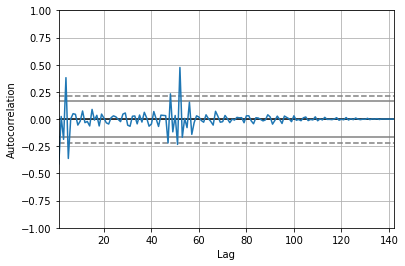

<Figure size 720x720 with 0 Axes>

In [ ]:
#Transforming to stationary using differencing
#using plot finding out
analysis_diff=analysis.diff(1).dropna()

autocorrelation_plot(analysis_diff)
pyplot.figure(figsize=(10,10))
pyplot.show()



**It can be seen from the graph that still the data is not stationary**

In [ ]:
#using dk-filler test

testdf1=adfuller(analysis_diff)
dfoutput1 = pd.Series(testdf1[0:4], index=['Test Statistic', 'p-value', 'No. of lags used', 'No. of observations used'])

for key, value in testdf1[4].items():
    dfoutput1['Critical value (%s)'%key] = value
print(dfoutput1)

Test Statistic             -6.699469e+00
p-value                     3.922579e-09
No. of lags used            7.000000e+00
No. of observations used    1.340000e+02
Critical value (1%)        -3.480119e+00
Critical value (5%)        -2.883362e+00
Critical value (10%)       -2.578407e+00
dtype: float64


**Still not stationary**

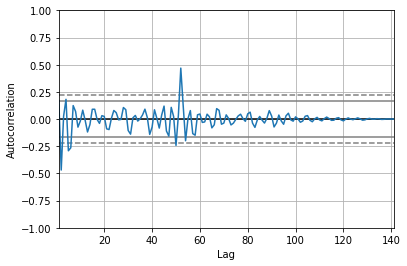

<Figure size 720x720 with 0 Axes>

In [ ]:
analysis_diff2=analysis.diff(2).dropna()
autocorrelation_plot(analysis_diff2)
pyplot.figure(figsize=(10,10))
pyplot.show()


**Now the graphs shows linear behaviour and now can be concluded that data is stationary.**

In [ ]:
#using dk-filler test

testdf2=adfuller(analysis_diff2)
dfoutput2 = pd.Series(testdf2[0:4], index=['Test Statistic', 'p-value', 'No. of lags used', 'No. of observations used'])

for key, value in testdf2[4].items():
    dfoutput2['Critical value (%s)'%key] = value
print(dfoutput2)

Test Statistic             -7.276766e+00
p-value                     1.537185e-10
No. of lags used            4.000000e+00
No. of observations used    1.360000e+02
Critical value (1%)        -3.479372e+00
Critical value (5%)        -2.883037e+00
Critical value (10%)       -2.578234e+00
dtype: float64


**As data is now stationary with difference of 2 the d value is 2**

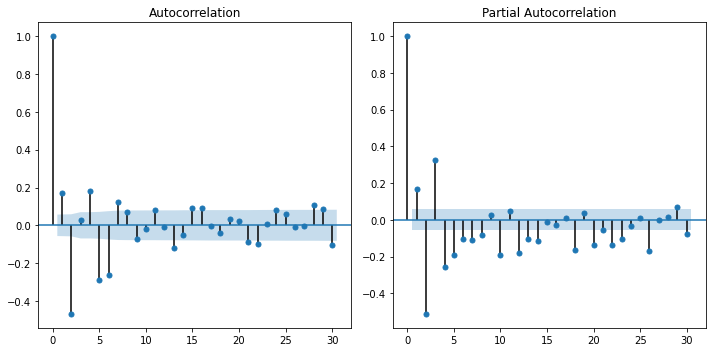

In [ ]:
##Finding p,q values using ACF and PACF

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(5)
ap.graphics.plot_acf(analysis_diff2, lags=30, ax=axes[0], alpha=0.5)
ap.graphics.plot_pacf(analysis_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

From above partial autocorelation graph we can see that two lags are significantly out of limit but second one is not that far when compared to one so the order of p can be taken as 1.


From above autocorelation graph there are two lags which are significantly out of limit so the order of q can be taken as 2. 

Date
2010-02-19   -1473746.72
2010-02-26   -4368106.50
2010-03-05   -1405523.48
2010-03-12    1956825.38
2010-03-19   -1882495.66
                 ...    
2011-10-14    2178989.49
2011-10-21   -1392734.92
2011-10-28    1481000.75
2011-11-04    2836590.86
2011-11-11    2618403.70
Name: Weekly_Sales, Length: 91, dtype: float64



statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

No frequency information was provided, so inferred frequency W-FRI will be used.
No frequency information was provided, so inferred frequency W-FRI will be used.


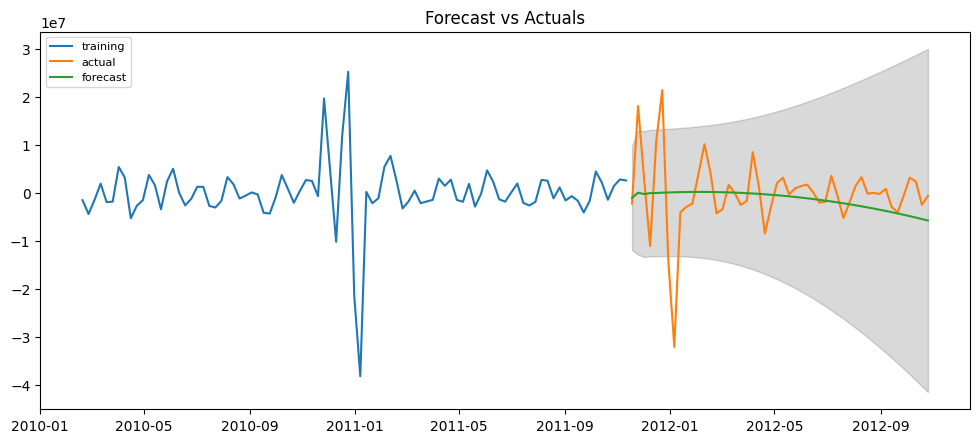

In [ ]:
#p-1 q-2 d-2(p,d,q)

from statsmodels.tsa.arima_model import ARIMA

#armodel=ARIMA(aref.astype(float),order=(1,2,2))

#armodel=ARIMA(aref.values.reshape(-1).tolist(),order=(1,2,2))


#print(len(analysis_diff2))

# Create Training and Test
train = analysis_diff2.head(91)
test = analysis_diff2.tail(50)

print(train)

armodel=ARIMA(train,order=(1,2,3))


armodel_fit=armodel.fit(disp=-1)

armodel_fit.summary()


fc, se, conf=armodel_fit.forecast(50, alpha=0.05)


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
##Performance metrics
mae = np.mean(np.abs(test.values - fc))   # MAE
print("The mean absolute error of the model =",mae)

mse=np.mean((test.values - fc)**2)  #MSE
print("The mean absolute error of the model =",mse) 

mape = np.mean(np.abs(test.values - fc)/np.abs(test.values)) #MAPE
print("The mean absolute percentage error of the model=",mape)

##The percentage to 100 is 392.33
#The score of the model is mean absolute percentage error - to its percentage

print("The score of the model is=",392.33-300)

The mean absolute error of the model = 5057731.956916306
The mean absolute error of the model = 59566858694429.85
The mean absolute percentage error of the model= 3.9233489986639842
The score of the model is= 92.32999999999998


In [ ]:
train_store_attributes11_35.isnull().sum() ## has some null value for columns 

train_store_attributes11_35.fillna(0,inplace=True)


anatest=train_store_attributes11_35.groupby('Date')['Weekly_Sales'].sum()
#autocorrelation_plot(anatest)
#pyplot.figure(figsize=(10,10))
#pyplot.show()

#print(anatest.head(2))
analysis_t2=anatest.diff(2).dropna()
#autocorrelation_plot(analysis_t2)
#pyplot.figure(figsize=(10,10))
#pyplot.show()


#print(len(analysis_t2))

# Create Training and Test
train_t = analysis_t2.head(91)
test_t = analysis_t2.tail(50)

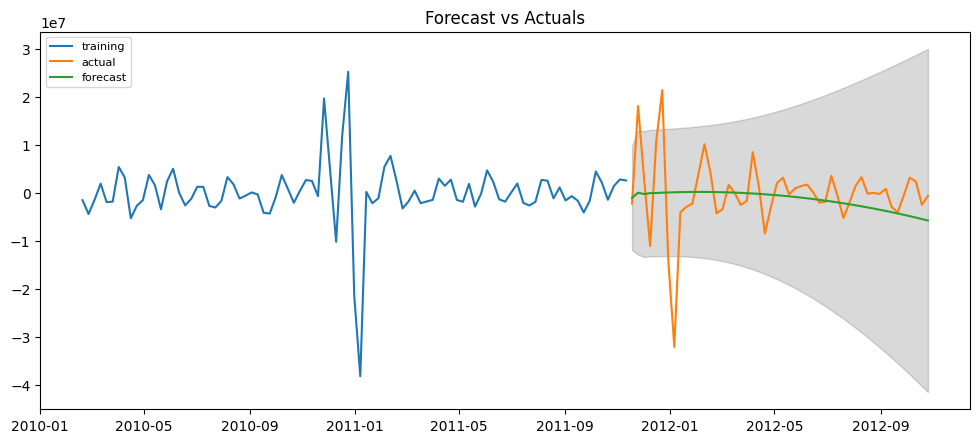

In [ ]:
#armodelt=ARIMA(train_t,order=(1,2,3))


#armodelt_fit=armodelt.fit(disp=-1)


#fct, see, conft=armodelt_fit.forecast(50,alpha=0.05)


fc_seriest = pd.Series(fc, index=test_t.index)
lower_seriest = pd.Series(conf[:, 0], index=test_t.index)
upper_seriest = pd.Series(conf[:, 1], index=test_t.index)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_t, label='training')
plt.plot(test_t, label='actual')
plt.plot(fc_seriest, label='forecast')
plt.fill_between(lower_seriest.index, lower_seriest, upper_seriest, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
##Performance metrics
maet = np.mean(np.abs(test_t.values - fc))   # MAE
print("The mean absolute error of the model =",maet)

mset=np.mean((test_t.values - fc)**2)  #MSE
print("The mean absolute error of the model =",mset) 

mapet = np.mean(np.abs(test_t.values - fc)/np.abs(test_t.values)) #MAPE
print("The mean absolute percentage error of the model=",mapet)

##The percentage to 100 is 392.33
#The score of the model is mean absolute percentage error - to its percentage

print("The score of the model is=",392.33-300)

The mean absolute error of the model = 5057731.956916306
The mean absolute error of the model = 59566858694429.85
The mean absolute percentage error of the model= 3.9233489986639842
The score of the model is= 92.32999999999998


**Model Prediction**

Before predicting the model should check whether adequate information has captured by looking at residuals. If model is good residuals looks like white noice.

Residual looks random in general and density is distributed normally around 0.Now can use ACF and PACF plots of residuals to get more understanding

There is no spikes at lower lags which shows that residuals are close to white noise and model with order=(1,2,2) used is correct. Now stepping to prediction calculation

**To determine the Store type**

**1)Ensemble models**

In [ ]:
print(train_store_storeattributes["Type"].unique())

print(train_store_storeattributes.info())


traine, teste = train_test_split(train_store_storeattributes, test_size=0.3, random_state=0)


x_traine=traine.drop(['Type','Date'],axis=1)
y_traine=traine['Type']


x_teste=teste.drop(['Type','Date'],axis=1)
y_teste=teste['Type']


[0 1 2]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  421570 non-null  int64         
 1   Dept                   421570 non-null  int64         
 2   Date                   421570 non-null  datetime64[ns]
 3   Weekly_Sales           421570 non-null  float64       
 4   IsHoliday              421570 non-null  bool          
 5   Type                   421570 non-null  int64         
 6   Size                   421570 non-null  int64         
 7   Temperature            421570 non-null  float64       
 8   gas_price              421570 non-null  float64       
 9   discount_promotional   421570 non-null  float64       
 10  discount_clearance     421570 non-null  float64       
 11  discount_damaged_good  421570 non-null  float64       
 12  discount_competitive   421570 non-nu

In [ ]:
##Using Max_voting 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

##XGB classifier
import xgboost as xgb
model1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1.fit(x_traine, y_traine)
print("Score with XGB classifier model=",model1.score(x_teste,y_teste))
pred1 = model1.predict(x_teste)
print("Prediction got for each record with XGB classifier",pred1)

#Decision Tree classifier
model2 = tree.DecisionTreeClassifier()
model2.fit(x_traine, y_traine)
print("Score with Decision tree model=",model2.score(x_teste,y_teste))
test_pred1=model1.predict(x_teste)
test_pred1=pd.DataFrame(test_pred1)
print("Prediction got for each record with Decision tree classifier",test_pred1)

#RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_traine, y_traine)
print("Score with random forest classifier model=",model3.score(x_teste,y_teste))
pred3 = model3.predict(x_teste)
print("Prediction got for each record with random forest classifier classifier",pred3)


#using max voting
model = VotingClassifier(estimators=[('xgb', model1), ('dt', model2),('rfc',model3)], voting='hard')
model.fit(x_traine,y_traine)
print("Score with max_voting with passed XGB,DT and RandomForest=",model.score(x_teste,y_teste))

# predicting the output on the test dataset
pred_final = model.predict(x_teste)
print("Prediction with max_voting for each record with passed XGB,DT and RandomForest",pred_final)


#using average weight
#pred1w=model1.predict_proba(x_teste)
#pred2w=model2.predict_proba(x_teste)
#pred3w=model3.predict_proba(x_teste)

#finalpred=(pred1w*0.3+pred2w*0.3+pred3w*0.4)

#print("Prediction with average weight for each record with passed XGB,DT and RandomForest",finalpred)

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
modelf = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
modelf.fit(x_traine, y_traine)
print("Score with Bagging estimator is =",modelf.score(x_teste,y_teste))
predfinalbc = modelf.predict(x_teste)

Score with XGB classifier model= 1.0
Prediction got for each record with XGB classifier [0 1 0 ... 0 1 1]
Score with Decision tree model= 1.0
Prediction got for each record with Decision tree classifier         0
0       0
1       1
2       0
3       0
4       1
...    ..
126466  1
126467  0
126468  0
126469  1
126470  1

[126471 rows x 1 columns]
Score with random forest classifier model= 1.0
Prediction got for each record with random forest classifier classifier [0 1 0 ... 0 1 1]
Score with max_voting with passed XGB,DT and RandomForest= 1.0
Prediction with max_voting for each record with passed XGB,DT and RandomForest [0 1 0 ... 0 1 1]
Score with Bagging estimator is = 1.0


**The relevant graph for ensemble models**

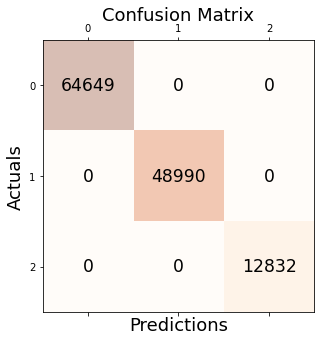

Precision of type A 0.9699920478926916
Precision of type B 1.0
Precision of type C 1.0
Prescison of the model 0.9899973492975639
Recall of type A 1.0
Recall of type B 1.0
Recall of type C 1.0
Recision of the model 1.0
The F1 score of the model 0.494949494949495
The F1 Score using f1_score 1.0
The accuracy of the model 1.0


In [ ]:
##confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score

conf_matrix = confusion_matrix(y_true=y_teste, y_pred=pred_final)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#Precision Score = TP / (FP + TP)

#Precision of a:

PSA=64649/(0+66649)
print("Precision of type A",PSA)

#Precision of b:
PSB=48990/(0+48990)
print("Precision of type B",PSB)

#Precision of C:
PSC=12832/(0+12832)
print("Precision of type C",PSC)


#Average precision of the model
AP=(PSA+PSB+PSC)/3
print("Prescison of the model",AP)

#Recall Score=TP/(FN+TP)

#Recall of a:
RA=64649/(0+64649)
print("Recall of type A",RA)

#Recall of b:
RB=64649/(64649+0)
print("Recall of type B",RB)

#Recall of c:
RC=64649/(64649+0)
print("Recall of type C",RC)

#Average recall of the model
AR=(RA+RB+RC)/3

print("Recision of the model",AR)


#F1 score Fs= (2* Precision Score * Recall Score)/ (Precision Score + Recall Score)
#F1 score using f1_score

FS=(0.98*1)/(0.98+1)

print("The F1 score of the model",FS)

print('The F1 Score using f1_score',f1_score(y_teste, pred_final,average='micro'))

#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP) 
ACA = (64649 + 61822) / (64649 + 0 + 61822 + 0)
ACB = (48990 + 77481) / (48990 + 0 + 77481 + 0) 
ACC = (12832 + 113639) / (12832 + 0 + 113639 + 0)
TA=(1+1+1)/3
print('The accuracy of the model',TA)


#tpr =  TP/(TP + FN)

tpa= 64649/(64649+0)
tpb=48990/(48990+0)
tpc=12832/(12832+0)

tpr=(tpa+tpb+tpc)/3


#fpr = 1 - TN/(TN+FP)

fpa= 1
fpb=1
fpc=1

fpr=(fpa+fpb+fpc)/3

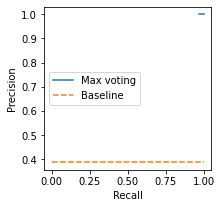

In [ ]:
##Precision recall curve
from sklearn.metrics import precision_recall_curve

precision_scores = []
recall_scores = []

precision_scores.append(PSA)
precision_scores.append(PSB)
precision_scores.append(PSC)

recall_scores.append(RA)
recall_scores.append(RB)
recall_scores.append(RC)

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(precision_scores,recall_scores, label='Max voting')
#ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_teste[y_teste==1]) / len(y_teste)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

[0 1 2]


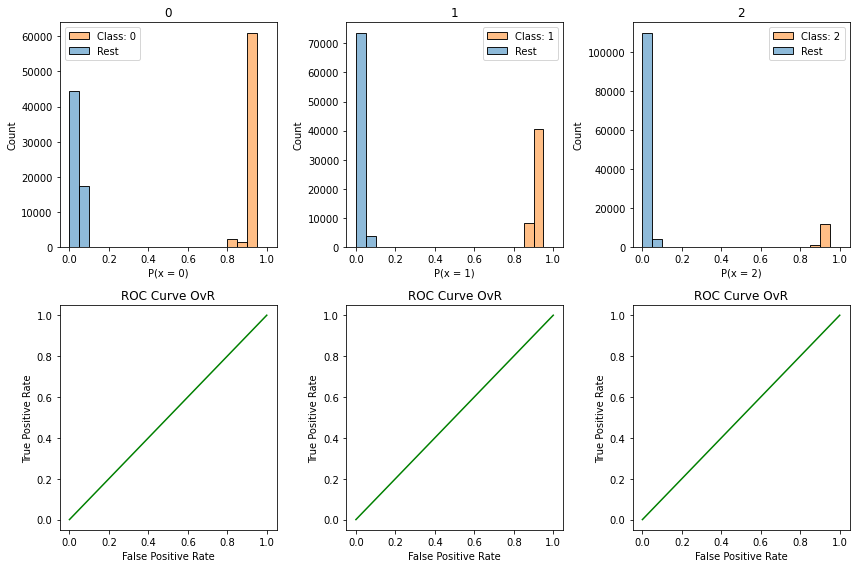

In [ ]:
##ROC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

#skplt.metrics.plot_roc(y_teste,pred_final ,figsize=(10, 8))   # Plot ROC Curve
#plt.show()


modely = VotingClassifier(estimators=[('xgb', model1), ('dt', model2),('rfc',model3)],voting='soft')
modely.fit(x_traine,y_traine)

yproba = modely.predict_proba(x_teste)

classes = modely.classes_
print(classes)

def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [1,1,1]
    fpr_list = [1,1,1]
    #for i in range(len(y_proba)):
   #     threshold = y_proba[i]
    #    y_pred = y_proba >= threshold
      #  tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
     #   tpr_list.append(1)
      #  fpr_list.append(1)
    return tpr_list, fpr_list


def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = x_teste.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_teste]
    df_aux['prob'] = yproba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
   # roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()



#y_score = modely.predict_proba(x_teste)[:, 1]
#fpr, tpr, thresholds = roc_curve(y_teste, y_score)

#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(y_teste[:, i], y_score[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])



RNN- 

In [ ]:
x_trainer=traine.drop(['Type','Date'],axis=1)
y_trainer=traine['Type']


x_tester=teste.drop(['Type','Date'],axis=1)
y_tester=teste['Type']

In [ ]:
x_trainer = np.array(x_trainer.reset_index().drop(["index"],axis=1)).astype('float32')
y_trainer= np.array(y_trainer.reset_index().drop(["index"],axis=1))
x_tester = np.array(x_tester.reset_index().drop(["index"],axis=1)).astype('float32')
y_tester = np.array(y_tester.reset_index().drop(["index"],axis=1))

In [ ]:
y_trainer

array([[1],
       [1],
       [2],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
x_tester.shape

(126471, 16)

In [ ]:
x_trainer

array([[4.500000e+01, 9.500000e+01, 5.528601e+04, ..., 9.000000e+00,
        9.000000e+00, 2.011000e+03],
       [2.900000e+01, 3.000000e+00, 5.215570e+03, ..., 2.400000e+01,
        6.000000e+00, 2.011000e+03],
       [4.400000e+01, 1.000000e+01, 2.425000e+01, ..., 2.700000e+01,
        4.000000e+00, 2.012000e+03],
       ...,
       [1.600000e+01, 3.200000e+01, 5.259850e+03, ..., 2.100000e+01,
        1.000000e+00, 2.011000e+03],
       [1.300000e+01, 3.000000e+00, 1.664802e+04, ..., 1.000000e+00,
        4.000000e+00, 2.011000e+03],
       [3.200000e+01, 1.400000e+01, 1.373006e+04, ..., 1.900000e+01,
        3.000000e+00, 2.010000e+03]], dtype=float32)

In [ ]:
x_trainer.shape

(295099, 16)

In [ ]:
y_tester

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
import tensorflow as tf
y_trainer = tf.keras.utils.to_categorical(y_trainer, num_classes=3).astype("int")
y_tester = tf.keras.utils.to_categorical(y_tester, num_classes=3).astype("int")

In [ ]:
y_trainer.astype("int")

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
y_tester.shape

(126471, 3)

In [ ]:
print(x_tester.shape)
x_trainer.shape


(126471, 16)


(295099, 16)

In [ ]:
y_tester.shape

(126471, 3)

In [ ]:
#tempo  = pd.DataFrame(atotal).apply(lambda x:x.argmax(axis=0),axis=1)


In [ ]:
#y_predr = np.array(temp.reset_index().drop(["index"],axis=1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding
from keras.layers import LSTM
from keras.layers import Activation, Dropout, Flatten, Dense


model_r = Sequential()
model_r.add(Dense(32,input_dim=16, activation='relu'))
#model_r.add(SimpleRNN(32))
#model_r.add(Embedding(32, input_dim=16, activation='relu'))
#model_r.add(SimpleRNN(64))
#model_r.add(Dense(3,activation='softmax'))
#model_r.compile(loss='mean_squared_error', optimizer='adam')
model_r.add(Dense(16, activation='relu'))
model_r.add(Dense(3,activation='softmax'))
#model.compile(loss='mean_squared_error', optimizer='adam')


#model_r.add(Embedding(input_dim=16, output_dim=64))
#model_r.add(SimpleRNN(32))
# model_r.add(SimpleRNN(32))
# model_r.add(SimpleRNN(16))
#model_r.add(Dense((3), activation='softmax'))

#model_r.add(Activation('softmax'))
	# Compile model
model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_r.fit(x_trainer, y_trainer, validation_data=(x_tester, y_tester), epochs=5, batch_size=32)

Epoch 1/5
9222/9222 [==============================] - 38s 4ms/step - loss: 53.5014 - accuracy: 0.8233 - val_loss: 6.3111 - val_accuracy: 0.9362
Epoch 2/5
9222/9222 [==============================] - 35s 4ms/step - loss: 11.5482 - accuracy: 0.9090 - val_loss: 6.6665 - val_accuracy: 0.8885
Epoch 3/5
9222/9222 [==============================] - 35s 4ms/step - loss: 7.4593 - accuracy: 0.9310 - val_loss: 2.0216 - val_accuracy: 0.9700
Epoch 4/5
9222/9222 [==============================] - 35s 4ms/step - loss: 4.1670 - accuracy: 0.9477 - val_loss: 1.9896 - val_accuracy: 0.9069
Epoch 5/5
9222/9222 [==============================] - 32s 3ms/step - loss: 2.4400 - accuracy: 0.9577 - val_loss: 0.6043 - val_accuracy: 0.9801


In [ ]:
arr = model_r.predict(x_tester)

3953/3953 [==============================] - 6s 1ms/step


In [ ]:
arr[2].argmax(axis=0)

0

In [ ]:
temp  = pd.DataFrame(arr).apply(lambda x:x.argmax(axis=0),axis=1)
# np.array(pd.DataFrame(arr).apply(lambda x:x.argmax(axis=0),axis=1).reset_index().drop(["index"]),axis=1)

In [ ]:
y_predr = np.array(temp.reset_index().drop(["index"],axis=1))

In [ ]:
#for a in arr:
 # print(a.argmax())

#print(y_predr[2])

rlabels=np.argmax(arr, axis=1)
rlabels[2]

rtrue=np.argmax(y_tester, axis=1)
rtrue[1]

1

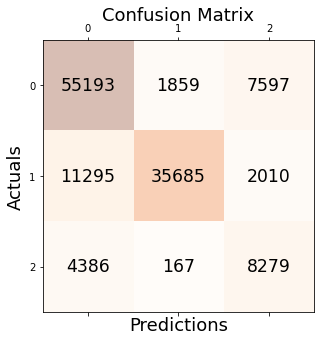

In [ ]:
##Plotting relevant graphs

# Print the confusion matrix using Matplotlib
confmatrixr = confusion_matrix(y_true=rtrue, y_pred=rlabels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmatrixr, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confmatrixr.shape[0]):
    for j in range(confmatrixr.shape[1]):
        ax.text(x=j, y=i,s=confmatrixr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
NAA = 61109 / (3540 + 61109) 
print("Precision of type A",NAA)

NBB = 48558 / (432 + 48558) 
print("Precision of type A",NBB)

NCC = 9968 / (2864 + 9968)
print("Precision of type A",NCC)

NA = (0.94 + 0.99 + 0.77) / 3
print("Precision of model",NA)


#Recall Score:

DAA = 61109 / (853 + 61109)
print("Recall of type A",DAA)

DBB = 48558 / (2430 + 48558)
print("Recall of type B",DBB)

DCC = 9968 / (3553 + 9968) 
print("Recall of type B",DCC)

DA = (0.98 + 0.95 + 0.73) / 3 
print("Recall of type B",DA)

#Accuracy
PAA =(61109 + 60969) / (61109 + 853 + 60969 + 3540)
print("Accuracy of Type A",PAA)

PBB =(48558 + 75051) / (48558 + 2430 + 75051 + 432) 
print("Accuracy of Type B",PBB)

PCC = (9968 + 110086) / (9968 + 3553 + 110086 + 2864)
print("Accuracy of Type B",PCC)

PMA =(0.96 + 0.97 + 0.94) / 3
print("Accuracy of Type B",PMA)


#F1 score
FSR = (2 * 0.9 * 0.88) / (0.9 + 0.88) 
print("The F1 score of the model",FSR)
print('The F1 Score using f1_score',f1_score(rtrue,rlabels,average='micro'))



Precision of type A 0.9452427725100156
Precision of type A 0.9911818738518064
Precision of type A 0.7768079800498753
Precision of model 0.9
Recall of type A 0.9862334979503566
Recall of type B 0.952341727465286
Recall of type B 0.7372235781377117
Recall of type B 0.8866666666666667
Accuracy of Type A 0.9652647642542559
Accuracy of Type B 0.9773703062362122
Accuracy of Type B 0.9492610954289916
Accuracy of Type B 0.9566666666666667
The F1 score of the model 0.8898876404494382
The F1 Score using f1_score 0.7840295403689383


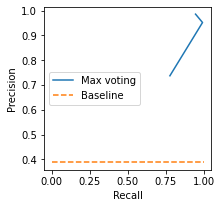

In [ ]:
##Precision recall curve
from sklearn.metrics import precision_recall_curve

precision_scoresr = []
recall_scoresr = []

precision_scoresr.append(NAA)
precision_scoresr.append(NBB)
precision_scoresr.append(NCC)

recall_scoresr.append(DAA)
recall_scoresr.append(DBB)
recall_scoresr.append(DCC)

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(precision_scoresr,recall_scoresr, label='Max voting')
#ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(rtrue[rtrue==1]) / len(rtrue)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding
from keras.layers import LSTM
from keras.layers import Activation, Dropout, Flatten, Dense

model_rr = Sequential()
model_rr.add(Embedding(input_dim=16, output_dim=64))
model_rr.add(SimpleRNN(32))
model_rr.add(Dense((3), activation='softmax'))


	# Compile model
model_rr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rr.fit(x_trainer, y_trainer, validation_data=(x_tester, y_tester), epochs=5, batch_size=32)

Epoch 1/5
9222/9222 [==============================] - 167s 18ms/step - loss: 0.4933 - accuracy: 0.7442 - val_loss: 0.4621 - val_accuracy: 0.7605
Epoch 2/5
9222/9222 [==============================] - 178s 19ms/step - loss: 0.4507 - accuracy: 0.7636 - val_loss: 0.4386 - val_accuracy: 0.7724
Epoch 3/5
9222/9222 [==============================] - 164s 18ms/step - loss: 0.4327 - accuracy: 0.7739 - val_loss: 0.4250 - val_accuracy: 0.7754
Epoch 4/5
9222/9222 [==============================] - 173s 19ms/step - loss: 0.4217 - accuracy: 0.7794 - val_loss: 0.4169 - val_accuracy: 0.7821
Epoch 5/5
9222/9222 [==============================] - 173s 19ms/step - loss: 0.4153 - accuracy: 0.7819 - val_loss: 0.4139 - val_accuracy: 0.7840


In [ ]:
pred_mod=model_rr.predict(x_tester)

3953/3953 [==============================] - 11s 3ms/step


In [ ]:
pred_mod[2].argmax(axis=0)

2

In [ ]:
dat=pd.DataFrame(pred_mod).apply(lambda x:x.argmax(axis=0),axis=1)

In [ ]:
y_predrr = np.array(dat.reset_index().drop(["index"],axis=1))

In [ ]:
rlabelss=np.argmax(pred_mod, axis=1)
rlabelss[2]

rtruee=np.argmax(y_tester, axis=1)
rtruee[1]

1

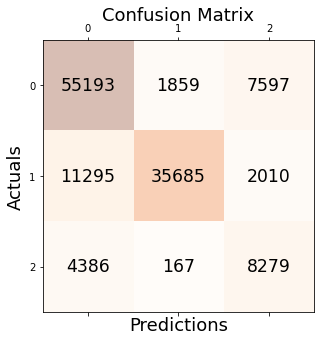

In [ ]:
confmatrixrr = confusion_matrix(y_true=rtruee, y_pred=rlabelss)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmatrixrr, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confmatrixrr.shape[0]):
    for j in range(confmatrixrr.shape[1]):
        ax.text(x=j, y=i,s=confmatrixrr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Precision Score = TP / (FP + TP)

NAAR = 55193 / (9456 + 55193) 
print("Precision of type A",NAAR)

NBBR = 35685 / (13305 + 35685) 
print("Precision of type A",NBBR)

NCCR = 8279 / (4553 + 8279)
print("Precision of type A",NCCR)

NAR = (NAAR+NBBR+NCCR) / 3
print("Precision of model",NAR)

#Recall Score=TP/(FN+TP)

#Recall Score:

DAAR = 55193 / (15681 + 55193)
print("Recall of type A",DAAR)

DBBR = 35685 / (2026 + 35685)
print("Recall of type B",DBBR)

DCCR = 8279 / (9607 + 8279) 
print("Recall of type c",DCCR)

DAR = (DAAR+DBBR+DCCR) / 3 
print("Recall of model",DAR)


#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP) 
#Accuracy
PAAR =(55193 + 46141) / (55193 + 15681 + 46141 + 9456)
print("Accuracy of Type A",PAAR)

PBBR =(35685 + 75455) / (35685 + 2026 + 75455 + 13305) 
print("Accuracy of Type B",PBBR)

PCCR = (8279 + 104032) / (8279 + 9607 + 104032 + 4553)
print("Accuracy of Type C",PCCR)

PMAR =(PAAR+PBBR+PCCR) / 3
print("Accuracy of model",PMAR)

#F1 score
#F1 score Fs= (2* Precision Score * Recall Score)/ (Precision Score + Recall Score)
#F1 score using f1_score
FSRR = (2 * 0.742 * 0.729) / (0.742 + 0.729) 
print("The F1 score of the model",FSRR)
print('The F1 Score using f1_score',f1_score(rtruee,rlabelss,average='micro'))


Precision of type A 0.8537332363996349
Precision of type A 0.728413962033068
Precision of type A 0.64518391521197
Precision of model 0.7424437045482243
Recall of type A 0.7787482010328188
Recall of type B 0.9462756224974146
Recall of type c 0.46287599239628757
Recall of model 0.7292999386421738
Accuracy of Type A 0.8012429726972982
Accuracy of Type B 0.8787785342094235
Accuracy of Type C 0.888037573831155
Accuracy of model 0.8560196935792922
The F1 score of the model 0.7354425560842963
The F1 Score using f1_score 0.7840295403689383


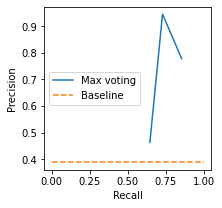

In [ ]:
##Precision recall curve
from sklearn.metrics import precision_recall_curve

precision_scoresrr = []
recall_scoresrr = []

precision_scoresrr.append(NAAR)
precision_scoresrr.append(NBBR)
precision_scoresrr.append(NCCR)

recall_scoresrr.append(DAAR)
recall_scoresrr.append(DBBR)
recall_scoresrr.append(DCCR)

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(precision_scoresrr,recall_scoresrr, label='Max voting')
#ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baselinee = len(rtruee[rtruee==1]) / len(rtruee)
ax.plot([0, 1], [baselinee, baselinee], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

**CNN**

In [ ]:
train_store_storeattributess=train_store.merge(merge_store12345678910_11_35, how="left", on=['Store','Date','IsHoliday'])
print(train_store_storeattributess.info())
dataa = train_store_storeattributess.dropna()


In [ ]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_trainc, X_testc = X[train_ix], X[test_ix]
        y_trainc, y_testc = y[train_ix], y[test_ix]
        # define model
        modelc = get_model(n_inputs, n_outputs)
        # fit model
        modelc.fit(X_trainc, y_trainc, verbose=0, epochs=100)
        # make a prediction on the test set
        yhat = modelc.predict(X_testc)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_testc, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results

In [ ]:
dataa.info()

In [ ]:
yc = dataa.pop('Type')
data_ = dataa.drop('Date',axis=1)
Xc = data_


In [ ]:
X_ = Xc.to_numpy().astype('float32')

In [ ]:

from sklearn.preprocessing import OneHotEncoder

jobs_encoder = OneHotEncoder()
transformed = jobs_encoder.fit_transform(yc.to_numpy().reshape(-1, 1))
transformed_ = transformed.toarray()


In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

results = evaluate_model(X_, transformed_)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))